# __Data Science Salary Trend - *Exploratory Data Analysis*__

__Columns in the dataset:__

1. Job Title                                                                             
2. Employment Type                                                                                                    
3. Experience Level                                                                                                                                              
4. Expertise Level                                                                                               
5. Salary                                                                                                    
6. Salary Currency                                                                                                   
7. Company Location                                                                                                           
8. Salary in USD                                                                                                                  
9. Employee Residence                                                                                                                        
10. Company Size                                                                                                 
11. Year                                                                                                        

I focused primarily on the following columns for my EDA - Job Title, Employment Type, Experience Level, Expertise Level, Company Location, Salary in USD, Company Size and Year.

__Kaggle Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/data-science-salaries-2023__

__Acronyms Used:__

BI --> 'Business Intelligence'                                                                
ML --> 'Machine Learning'                                                                                  
AI --> 'Artificial Intelligence'                                                                        
NLP --> 'Natural Language Processing' 

     

# __1: Import Packages__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from matplotlib.colors import LinearSegmentedColormap

# __2: Read CSV__

In [2]:
df1 = pd.read_csv('v1_Latest_Data_Science_Salaries.csv')
df2 = pd.read_csv('v2_Latest_Data_Science_Salaries.csv')
df3 = pd.read_csv('v3_Latest_Data_Science_Salaries.csv')
df4 = pd.read_csv('v4_Latest_Data_Science_Salaries.csv')
df5 = pd.read_csv('v5_Latest_Data_Science_Salaries.csv')
df6 = pd.read_csv('v6_Latest_Data_Science_Salaries.csv')

# __3: Show columns__

__All the 6 different CSVs read have the same number of column with same name.__

In [3]:
print("df1 ->", df1.columns, 'and number of columns ->', len(df1.columns))
print("df2 ->", df2.columns, 'and number of columns ->', len(df2.columns))
print("df3 ->", df3.columns, 'and number of columns ->', len(df3.columns))
print("df4 ->", df4.columns, 'and number of columns ->', len(df4.columns))
print("df5 ->", df5.columns, 'and number of columns ->', len(df5.columns))
print("df6 ->", df6.columns, 'and number of columns ->', len(df6.columns))

df1 -> Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object') and number of columns -> 11
df2 -> Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object') and number of columns -> 11
df3 -> Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object') and number of columns -> 11
df4 -> Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
  

# __4: Rows and Columns of each dataframe__

In [4]:
print("df1 ->", df1.shape)
print("df2 ->", df2.shape)
print("df3 ->", df3.shape)
print("df4 ->", df4.shape)
print("df5 ->", df5.shape)
print("df6 ->", df6.shape)

df1 -> (3300, 11)
df2 -> (3470, 11)
df3 -> (3552, 11)
df4 -> (3683, 11)
df5 -> (3951, 11)
df6 -> (4976, 11)


# __5: Merge dataframes__ - All the 6 DFs are appended one after the other to form a single DF

In [5]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)
df = pd.concat([df, df3], axis=0, ignore_index=True)
df = pd.concat([df, df4], axis=0, ignore_index=True)
df = pd.concat([df, df5], axis=0, ignore_index=True)
df = pd.concat([df, df6], axis=0, ignore_index=True)

# __6: Rows and Columns__ of the merged dataframe

In [6]:
df.shape

(22932, 11)

# 7: Check for __NULL__ - No NULL values are present

In [7]:
df.isnull().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

# 8: Show the __datatypes__

In [8]:
df.dtypes

Job Title             object
Employment Type       object
Experience Level      object
Expertise Level       object
Salary                 int64
Salary Currency       object
Company Location      object
Salary in USD          int64
Employee Residence    object
Company Size          object
Year                   int64
dtype: object

# __9: Format columns__

## __9.1: Strip White Space__

In [9]:
df['Job Title'] = df['Job Title'].str.strip()
df['Employment Type'] = df['Employment Type'].str.strip()
df['Experience Level'] = df['Experience Level'].str.strip()
df['Expertise Level'] = df['Expertise Level'].str.strip()
df['Company Location'] = df['Company Location'].str.strip()
df['Company Size'] = df['Company Size'].str.strip()

## __9.2: Replace Values__

In [10]:
df['Job Title'] = df['Job Title'].str.replace('Business Intelligence', 'BI')
df['Job Title'] = df['Job Title'].str.replace('Machine Learning', 'ML')
df['Job Title'] = df['Job Title'].str.replace('Artificial Intelligence', 'AI')
df['Job Title'] = df['Job Title'].str.replace('Natural Language Processing', 'NLP')

# __10: Drop duplicates and re-check number of rows and columns__

__Drastic reduction in the number of rows after removing duplicates__

In [11]:
df.drop_duplicates(inplace=True)
df.shape

(4942, 11)

# __11: Write dataframe to excel (self-check purpose)__

In [12]:
#df.to_excel('output.xlsx', index=False)

# __12: Exploratory Data Analysis__

## __12.1: Job Title vs Number of Job Posting__


### __12.1.1: Top 20 Roles__

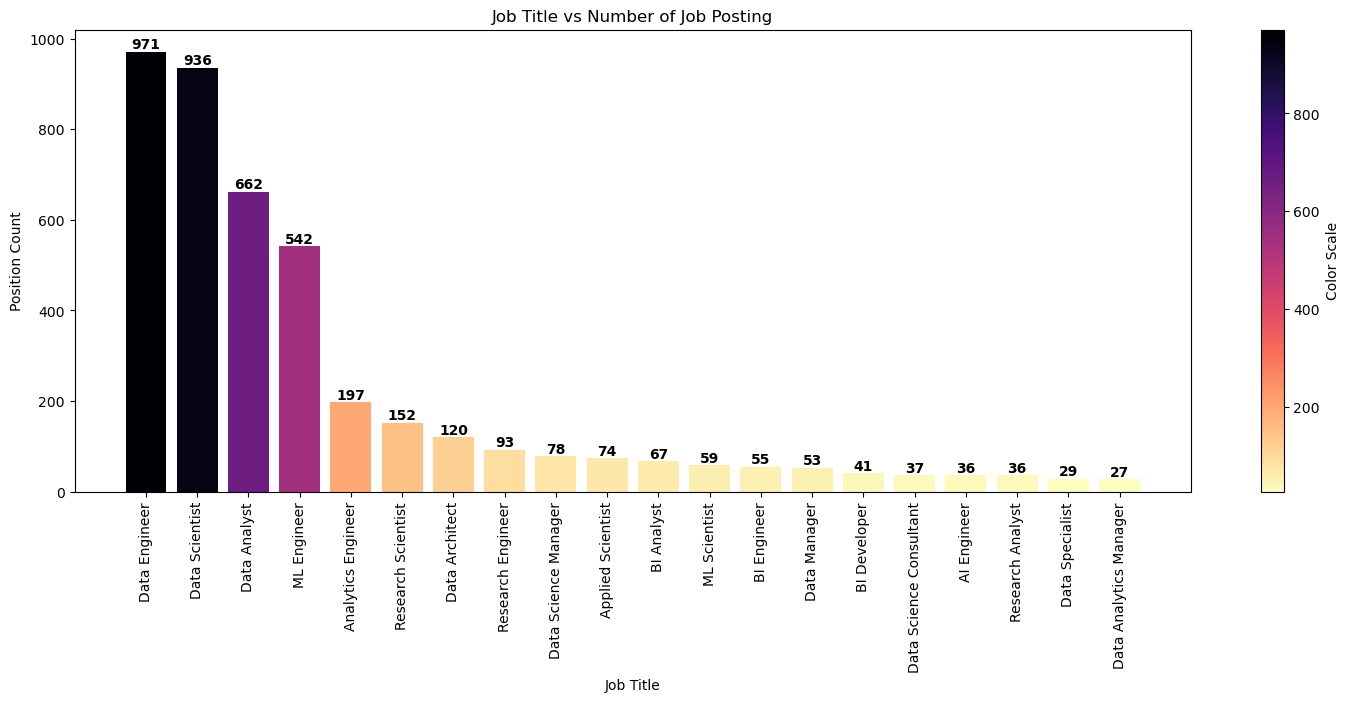

In [13]:
job_title_cnt = df['Job Title'].value_counts().head(20)
#job_over_80 = job_title_cnt[job_title_cnt > 100]

# Create a gradient color map
colormap = plt.cm.magma
# Reverse the colormap using Numpy
reversed_colormap = plt.cm.colors.ListedColormap(colormap(np.linspace(1, 0, 256)))
# Normalize data values to the range [0, 1] to match colormap
normalize = plt.Normalize(min(job_title_cnt), max(job_title_cnt))

fig, ax = plt.subplots(figsize=(18, 6))
# Create a bar 50
bars = ax.bar(job_title_cnt.index, job_title_cnt, color=reversed_colormap(normalize(job_title_cnt)))

# Adding labels and title
plt.xlabel('Job Title')
plt.ylabel('Position Count')
plt.title('Job Title vs Number of Job Posting')

#Annotate
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}',
             ha='center', va='bottom',
             weight='bold', size=10)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Display the color bar for reference (optional)
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=normalize, cmap=reversed_colormap), ax=ax)
cbar.set_label('Color Scale')
              
# Display the chart
plt.show()

### __12.1.2: Top 10 Roles__

Data Engineer           971
Data Scientist          936
Data Analyst            662
ML Engineer             542
Analytics Engineer      197
Research Scientist      152
Data Architect          120
Research Engineer        93
Data Science Manager     78
Applied Scientist        74
Name: Job Title, dtype: int64


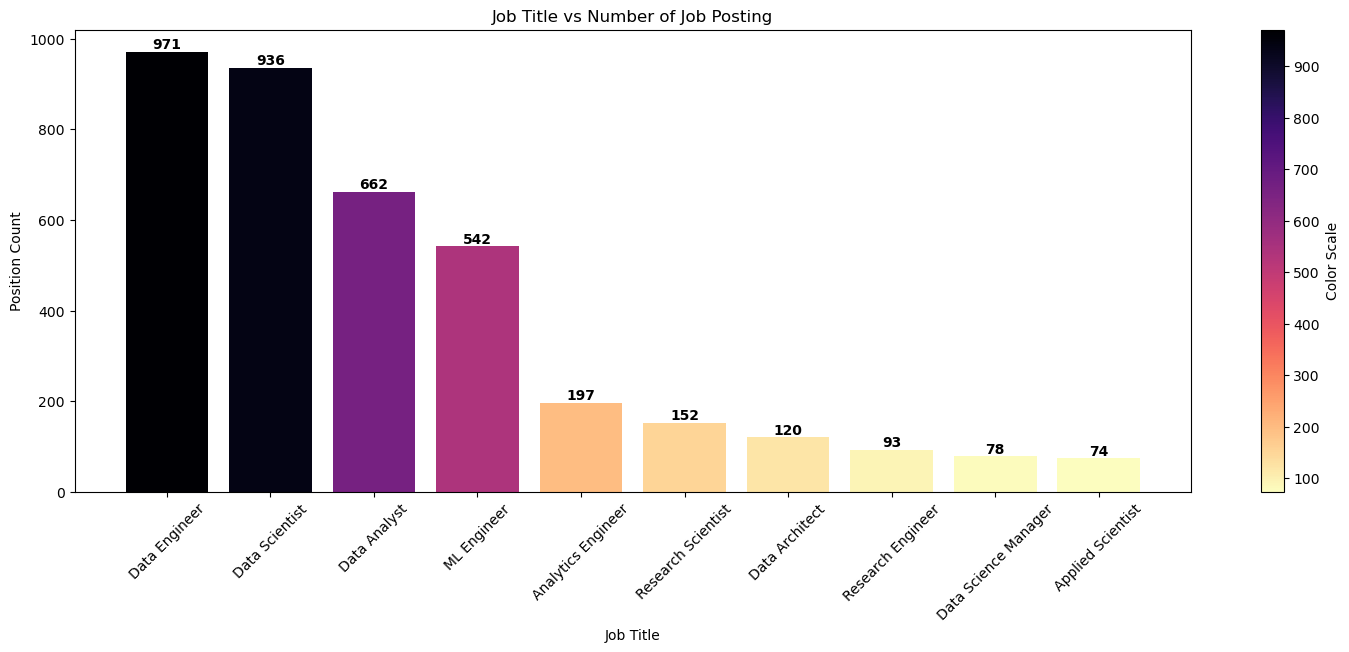

In [14]:
job_title_cnt = df['Job Title'].value_counts().head(10)
#job_over_80 = job_title_cnt[job_title_cnt > 100]

print(job_title_cnt)

# Create a gradient color map
colormap = plt.cm.magma
# Reverse the colormap using Numpy
reversed_colormap = plt.cm.colors.ListedColormap(colormap(np.linspace(1, 0, 256)))
# Normalize data values to the range [0, 1] to match colormap
normalize = plt.Normalize(min(job_title_cnt), max(job_title_cnt))

fig, ax = plt.subplots(figsize=(18, 6))
# Create a bar 50
bars = ax.bar(job_title_cnt.index, job_title_cnt, color=reversed_colormap(normalize(job_title_cnt)))

# Adding labels and title
plt.xlabel('Job Title')
plt.ylabel('Position Count')
plt.title('Job Title vs Number of Job Posting')

#Annotate
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}',
             ha='center', va='bottom',
             weight='bold', size=10)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the color bar for reference (optional)
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=normalize, cmap=reversed_colormap), ax=ax)
cbar.set_label('Color Scale')
              
# Display the chart
plt.show()

## __12.2: *df_filtered*__
__Creating *df_filtered* to contain the data for top 10 roles from the original dataset. The top 10 roles are determined on the basis of total count of the records in the file.__

In [15]:
df_filtered = pd.DataFrame()
for idx in job_title_cnt.index:
    df_filtered = pd.concat([df_filtered, df[df['Job Title'] == idx]], ignore_index=True)

#df_filtered.to_excel('output_filtered.xlsx', index=False)
df_filtered

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Engineer,Full-Time,Mid,Intermediate,85000,British Pound Sterling,United Kingdom,104584,United Kingdom,Medium,2023
...,...,...,...,...,...,...,...,...,...,...,...
3820,Applied Scientist,Full-Time,Senior,Expert,218213,United States Dollar,United States,218213,United States,Medium,2023
3821,Applied Scientist,Full-Time,Senior,Expert,178538,United States Dollar,United States,178538,United States,Medium,2023
3822,Applied Scientist,Full-Time,Senior,Expert,163000,United States Dollar,United States,163000,United States,Medium,2023
3823,Applied Scientist,Full-Time,Senior,Expert,212800,United States Dollar,United States,212800,United States,Large,2023


__1. Get unique job titles. The count is 10 in this case.__                                                                                      
__2. Determine the number of subplots in each line. We will plot 3 subplots in each line.__

In [16]:
unique_job_titles = df_filtered['Job Title'].unique()

# Determine the number of subplots based on the actual number of unique job titles
num_subplots = max(0, len(unique_job_titles))
num_rows = (num_subplots + 2) // 3  # Calculate the number of rows (at least 1 row)
num_cols = min(3, num_subplots)  # Each row contains at most 4 columns

### __12.2.1: Average Salary vs Job Title__

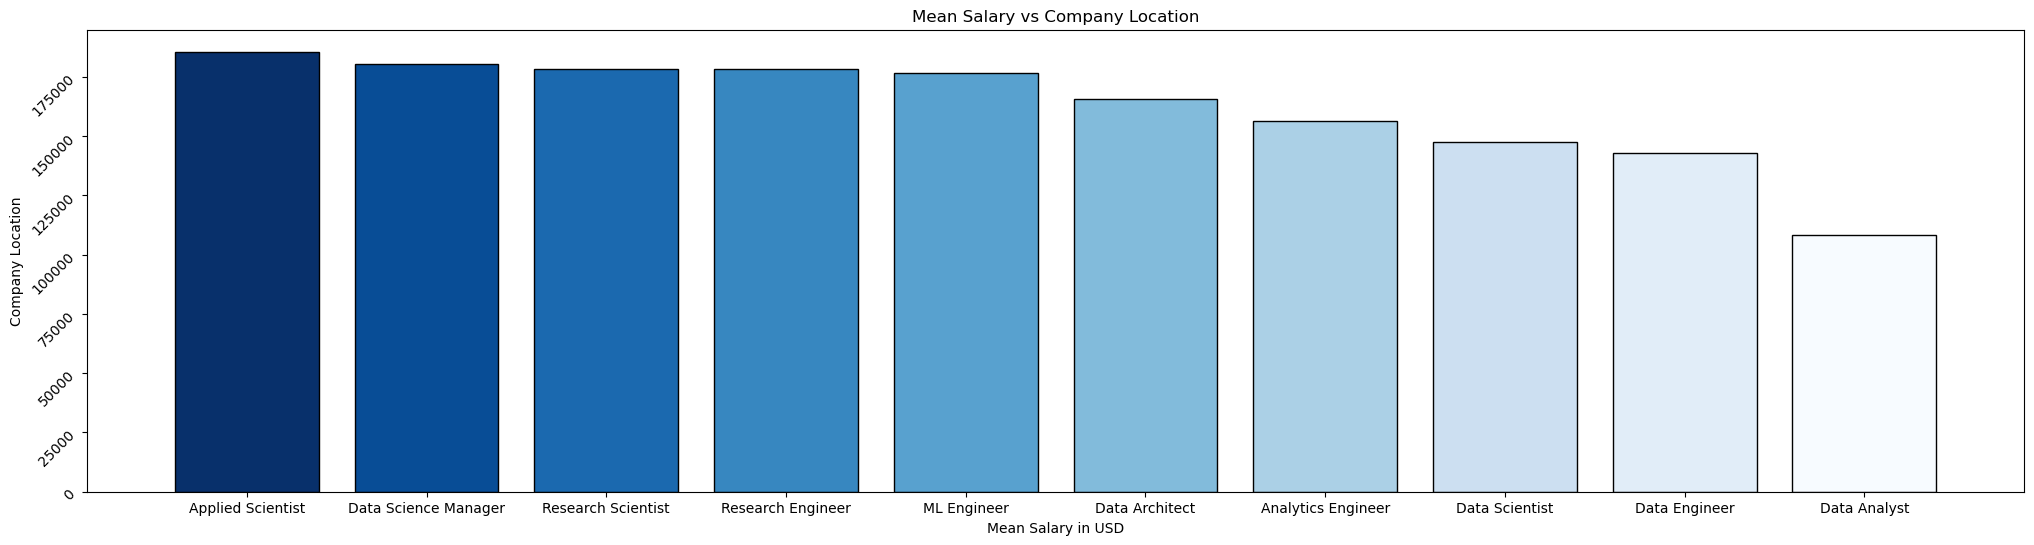

In [17]:
df_avg_sal = df_filtered.groupby('Job Title')['Salary in USD'].agg(Mean_Salary='mean').round(2).reset_index().sort_values('Mean_Salary', ascending=False)

# Create a blue gradient colormap
colors = plt.cm.Blues_r(np.linspace(0, 1, len(df_avg_sal)))

# Increase figure size
plt.figure(figsize=(25, 6))

# Create a horizontal bar chart
bars = plt.bar(df_avg_sal['Job Title'], df_avg_sal['Mean_Salary'], color=colors, edgecolor='black')

# Rotate x-axis and y-axis labels
plt.yticks(rotation=45)
#plt.xticks(rotation=90)

# Adding labels and title
plt.xlabel('Mean Salary in USD')
plt.ylabel('Company Location')
plt.title('Mean Salary vs Company Location')

# Display the plot
plt.show()

## __12.3: Year__

### __12.3.1: Count of Jobs vs Year (for each Job Title)__

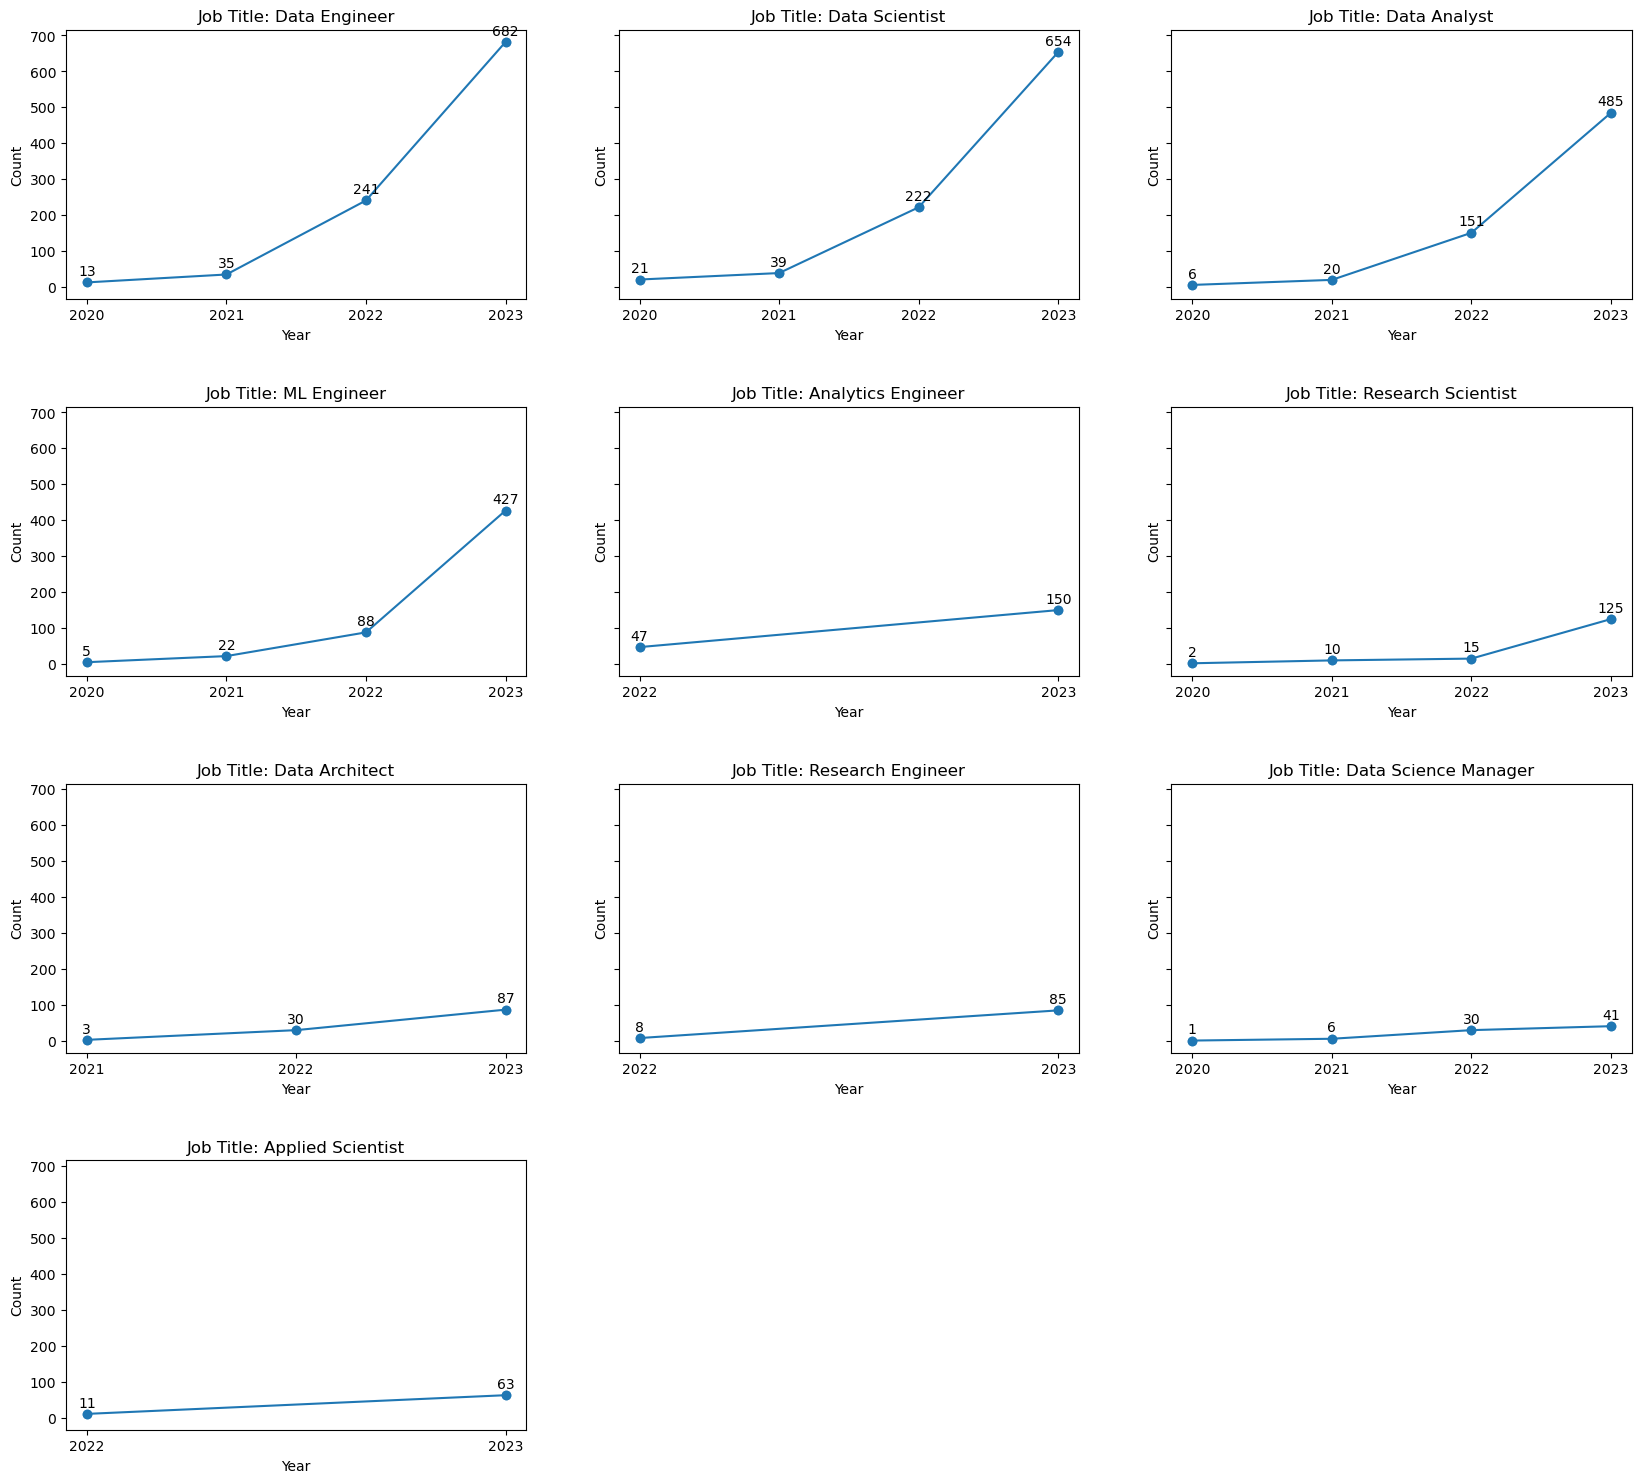

In [18]:
df_new = df_filtered.groupby(['Job Title', 'Year']).size().reset_index(name='Count')

# Create subplots dynamically
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows), sharey=True, sharex=False, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through subplots
for i in range(num_subplots):
    # Get data for the current subplot
    job_title = unique_job_titles[i]
    data = df_new[df_new['Job Title'] == job_title]

    # Plotting data points as well (scatter plot)
    axs[i].scatter(data['Year'], data['Count'], label=job_title, alpha=0.7)

    # Plotting a line connecting the data points
    axs[i].plot(data['Year'], data['Count'], marker='o', linestyle='-')

    # Annotating each data point with the count
    for j, count in enumerate(data['Count']):
        axs[i].annotate(count, xy=(data['Year'].iloc[j], count), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)
    
     # Set x-axis ticks as whole numbers
    axs[i].set_xticks(data['Year'].unique())

    # Adding labels and title to each subplot
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Job Title: {job_title}')

# Remove empty subplots if needed
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axs[i])

# Adjust layout with custom margins
plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.2)

# Display the plot
plt.show()


### __12.3.2: Average Salary vs Year (for each Job Title)__

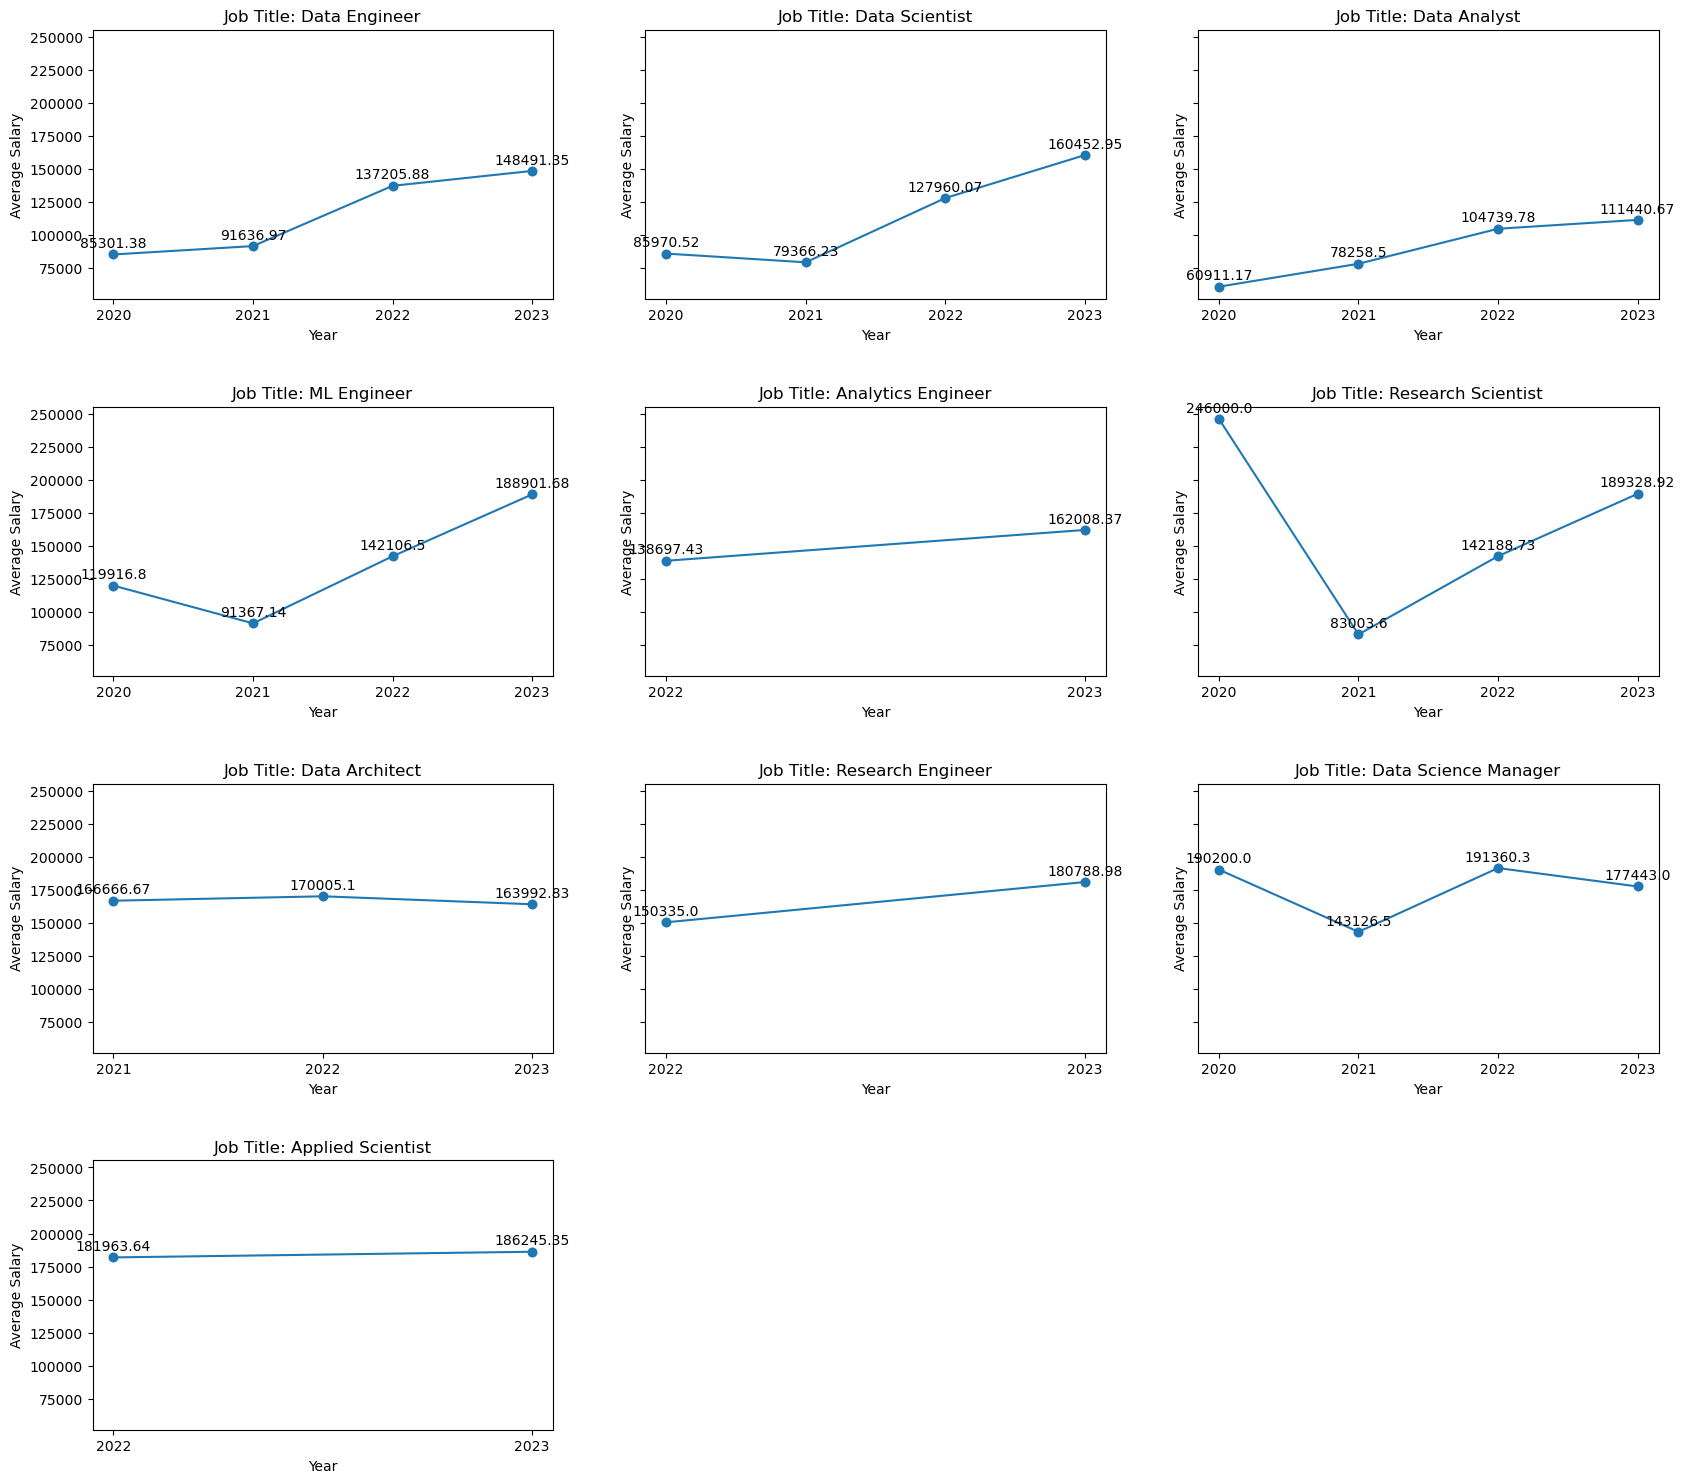

In [19]:
df_new_jt = df_filtered.groupby(['Job Title', 'Year'])['Salary in USD'].agg(Mean_Salary='mean').round(2).reset_index().sort_values('Mean_Salary', ascending=False)

# Create subplots dynamically
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows), sharey=True, sharex=False, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through subplots
for i in range(num_subplots):
    # Get data for the current subplot
    job_title = unique_job_titles[i]
    data = df_new_jt[df_new_jt['Job Title'] == job_title].sort_values('Year')


    # Plotting data points as well (scatter plot)
    axs[i].scatter(data['Year'], data['Mean_Salary'], label=job_title, alpha=0.7)

    # Plotting a line connecting the data points
    axs[i].plot(data['Year'], data['Mean_Salary'], marker='o', linestyle='-')

    # Annotating each data point with the count
    for j, count in enumerate(data['Mean_Salary']):
        axs[i].annotate(count, xy=(data['Year'].iloc[j], count), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)
    
     # Set x-axis ticks as whole numbers
    axs[i].set_xticks(data['Year'].unique())

    # Adding labels and title to each subplot
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Average Salary')
    axs[i].set_title(f'Job Title: {job_title}')

# Remove empty subplots if needed
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axs[i])

# Adjust layout with custom margins
plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.2)

# Display the plot
plt.show()


## __12.4: Company Location__

### __12.4.1: Average Salary vs Company Location__

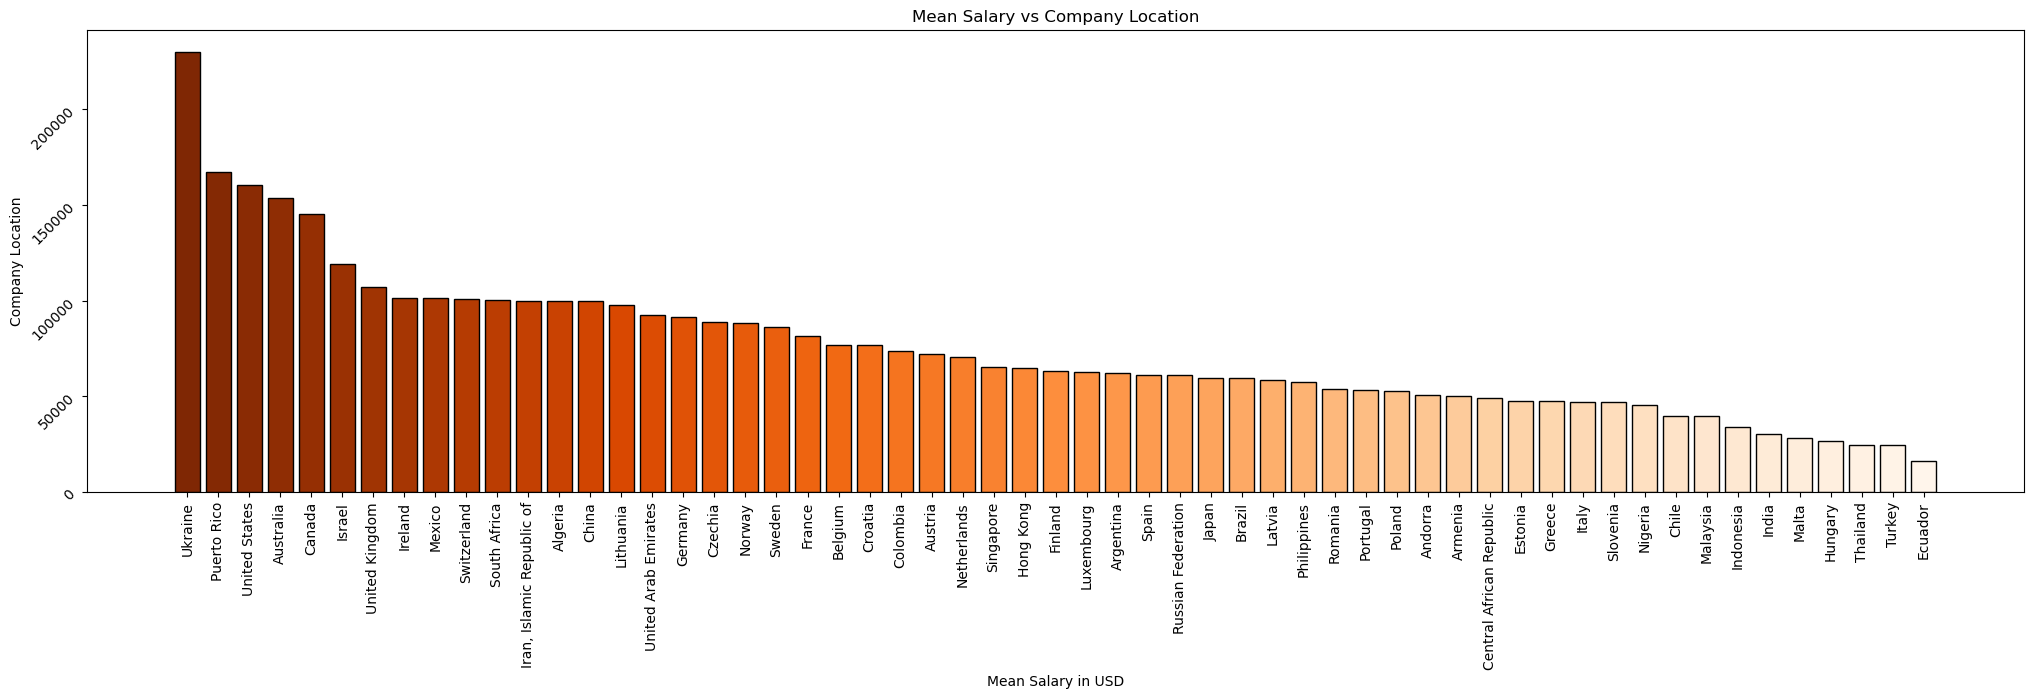

In [20]:
df_cl_avg_sal = df_filtered.groupby('Company Location')['Salary in USD'].agg(Mean_Salary='mean').round(2).reset_index().sort_values('Mean_Salary', ascending=False)

# Create a blue gradient colormap
colors = plt.cm.Oranges_r(np.linspace(0, 1, len(df_cl_avg_sal)))

# Increase figure size
plt.figure(figsize=(25, 6))

# Create a horizontal bar chart
bars = plt.bar(df_cl_avg_sal['Company Location'], df_cl_avg_sal['Mean_Salary'], color=colors, edgecolor='black')

# Rotate x-axis and y-axis labels
plt.yticks(rotation=45)
plt.xticks(rotation=90)

# Adding labels and title
plt.xlabel('Mean Salary in USD')
plt.ylabel('Company Location')
plt.title('Mean Salary vs Company Location')

# Display the plot
plt.show()

### __12.4.2: Company Location with 10 highest average salary__

53           Ukraine
42       Puerto Rico
56     United States
4          Australia
8             Canada
27            Israel
55    United Kingdom
26           Ireland
35            Mexico
50       Switzerland
Name: Company Location, dtype: object


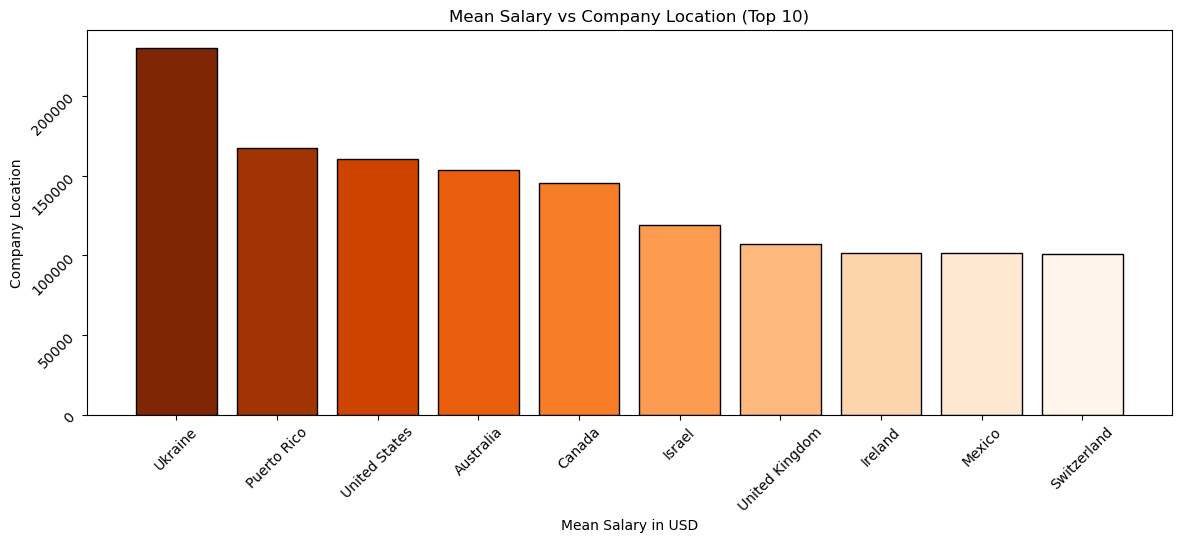

In [21]:
df_cl_avg_sal_top10 = df_cl_avg_sal.head(10)
highest_loc = df_cl_avg_sal_top10['Company Location']
print(highest_loc)

# Create a blue gradient colormap
colors = plt.cm.Oranges_r(np.linspace(0, 1, len(df_cl_avg_sal_top10)))

# Increase figure size
plt.figure(figsize=(14, 5))

# Create a horizontal bar chart
bars = plt.bar(df_cl_avg_sal_top10['Company Location'], df_cl_avg_sal_top10['Mean_Salary'], color=colors, edgecolor='black')

# Rotate x-axis and y-axis labels
plt.yticks(rotation=45)
plt.xticks(rotation=45)

# Adding labels and title
plt.xlabel('Mean Salary in USD')
plt.ylabel('Company Location')
plt.title('Mean Salary vs Company Location (Top 10)')

# Display the plot
plt.show()

### __12.4.3: Create a subset of *TOP 10* locations from *df_filtered*__

In [22]:
df_top10 = pd.DataFrame()
for cl in highest_loc:
    df_top10 = pd.concat([df_top10, df_filtered[df_filtered['Company Location'] == cl]], ignore_index=True)
df_top10.head(15)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,ML Engineer,Full-Time,Senior,Expert,240000,United States Dollar,Ukraine,240000,Ukraine,Medium,2023
1,ML Engineer,Full-Time,Senior,Expert,220000,United States Dollar,Ukraine,220000,Ukraine,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,200000,United States Dollar,Puerto Rico,200000,Puerto Rico,Medium,2022
3,Data Engineer,Full-Time,Senior,Expert,135000,United States Dollar,Puerto Rico,135000,Puerto Rico,Medium,2022
4,ML Engineer,Full-Time,Senior,Expert,200000,United States Dollar,Puerto Rico,200000,Puerto Rico,Medium,2022
5,ML Engineer,Full-Time,Senior,Expert,135000,United States Dollar,Puerto Rico,135000,Puerto Rico,Medium,2022
6,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
7,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
8,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
9,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023


### __12.4.4: Average Salary vs Company Location (For Each Job Title)__

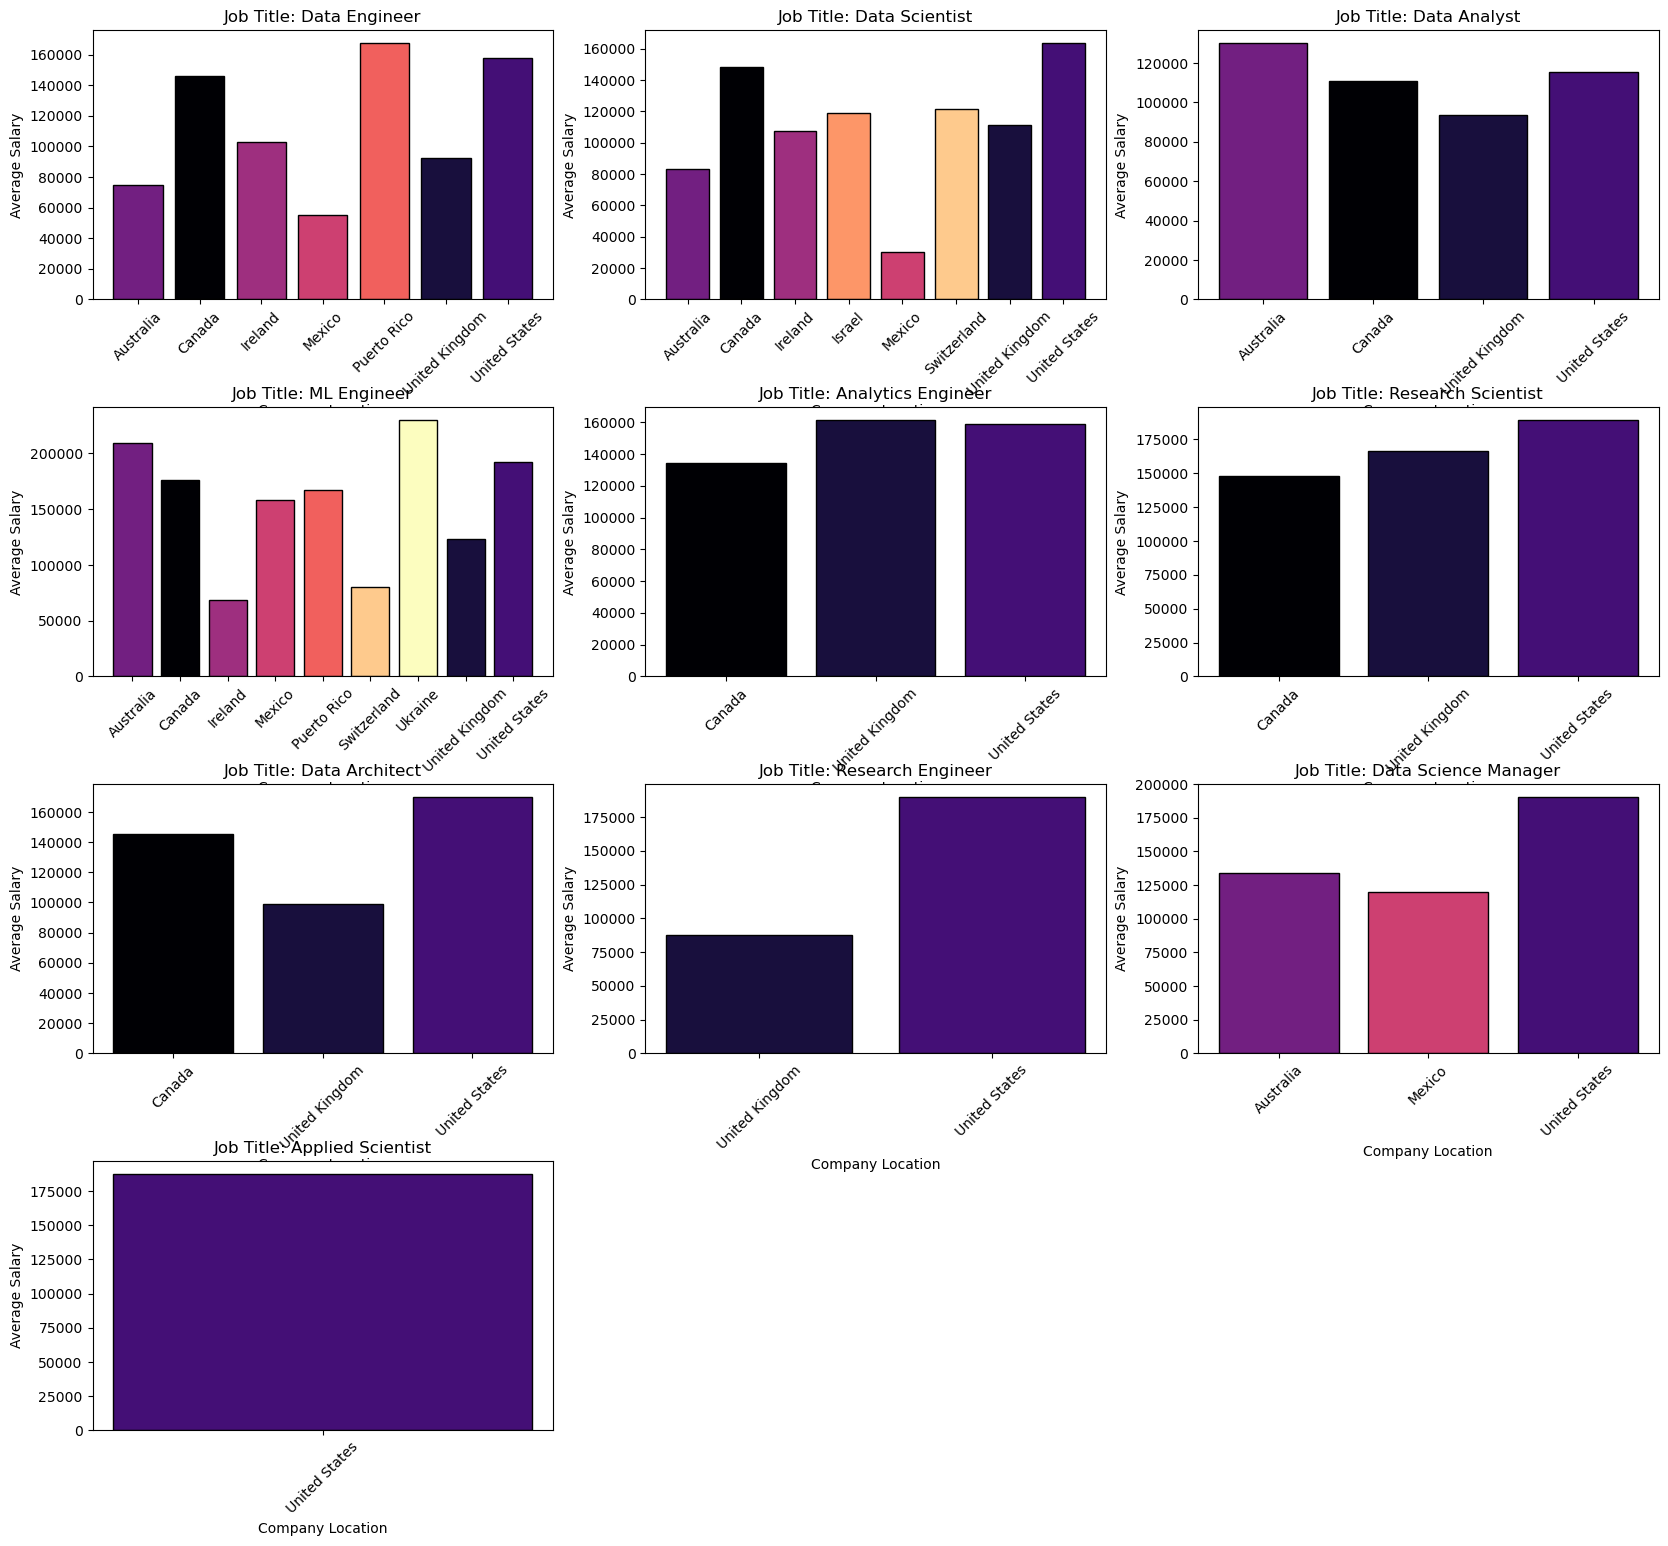

In [23]:
df_top10_grouped = df_top10.groupby(['Job Title', 'Company Location'])['Salary in USD'] \
                         .agg(Mean_Salary='mean').round(2).reset_index() \
                         .sort_values(by=['Job Title', 'Company Location', 'Mean_Salary'],
                                      ascending=[True, True, False])

# Color Mapping
unique_location = df_top10_grouped['Company Location'].unique()
colors = plt.cm.magma(np.linspace(0, 1, len(unique_location)))
color_mapping_cl_t5 = {location: color for location, color in zip(unique_location, colors)}

# Create subplots dynamically
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows), sharey=False, sharex=False, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through subplots
for i in range(num_subplots):
    # Get data for the current subplot
    job_title = unique_job_titles[i]
    data = df_top10_grouped[df_top10_grouped['Job Title'] == job_title]

    # Create a horizontal bar chart
    axs[i].bar(data['Company Location'], data['Mean_Salary'], color=[color_mapping_cl_t5[location] for location in data['Company Location']], edgecolor='black')
    
    # Set x-axis ticks as whole numbers
    axs[i].set_xticks(data['Company Location'].unique())
    axs[i].set_xticklabels(data['Company Location'].unique(), rotation=45)
    
    # Adding labels and title to each subplot
    axs[i].set_xlabel('Company Location')
    axs[i].set_ylabel('Average Salary')
    axs[i].set_title(f'Job Title: {job_title}')   
    
# Remove empty subplots if needed
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axs[i])

# Adjust layout with custom margins
plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.2)

# Display the plot
plt.show()

## __12.5: Company Size__

### __12.5.1: Average Salary vs Company Size__

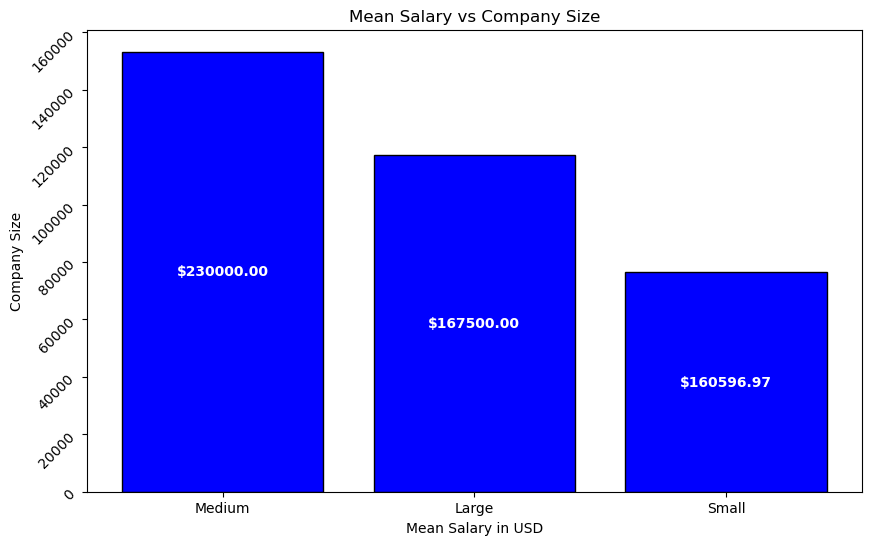

In [24]:
df_cs_avg_sal = df_filtered.groupby('Company Size')['Salary in USD'].agg(Mean_Salary='mean').round(2).reset_index().sort_values('Mean_Salary', ascending=False)

# Increase figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart
bars = plt.bar(df_cs_avg_sal['Company Size'], df_cs_avg_sal['Mean_Salary'], color='blue', edgecolor='black')

#Annotate each bar with the mean salary value at the top center
for bar, salary in zip(bars, df_cl_avg_sal['Mean_Salary']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'${salary:.2f}', ha='center', va='center', fontsize=10, color='white', weight='bold')

# Rotate x-axis and y-axis labels
plt.yticks(rotation=45)
#plt.xticks(rotation=90)

# Adding labels and title
plt.xlabel('Mean Salary in USD')
plt.ylabel('Company Size')
plt.title('Mean Salary vs Company Size')

# Display the plot
plt.show()

### __12.5.2: Average Salary vs Company Size (For Each Job Title)__

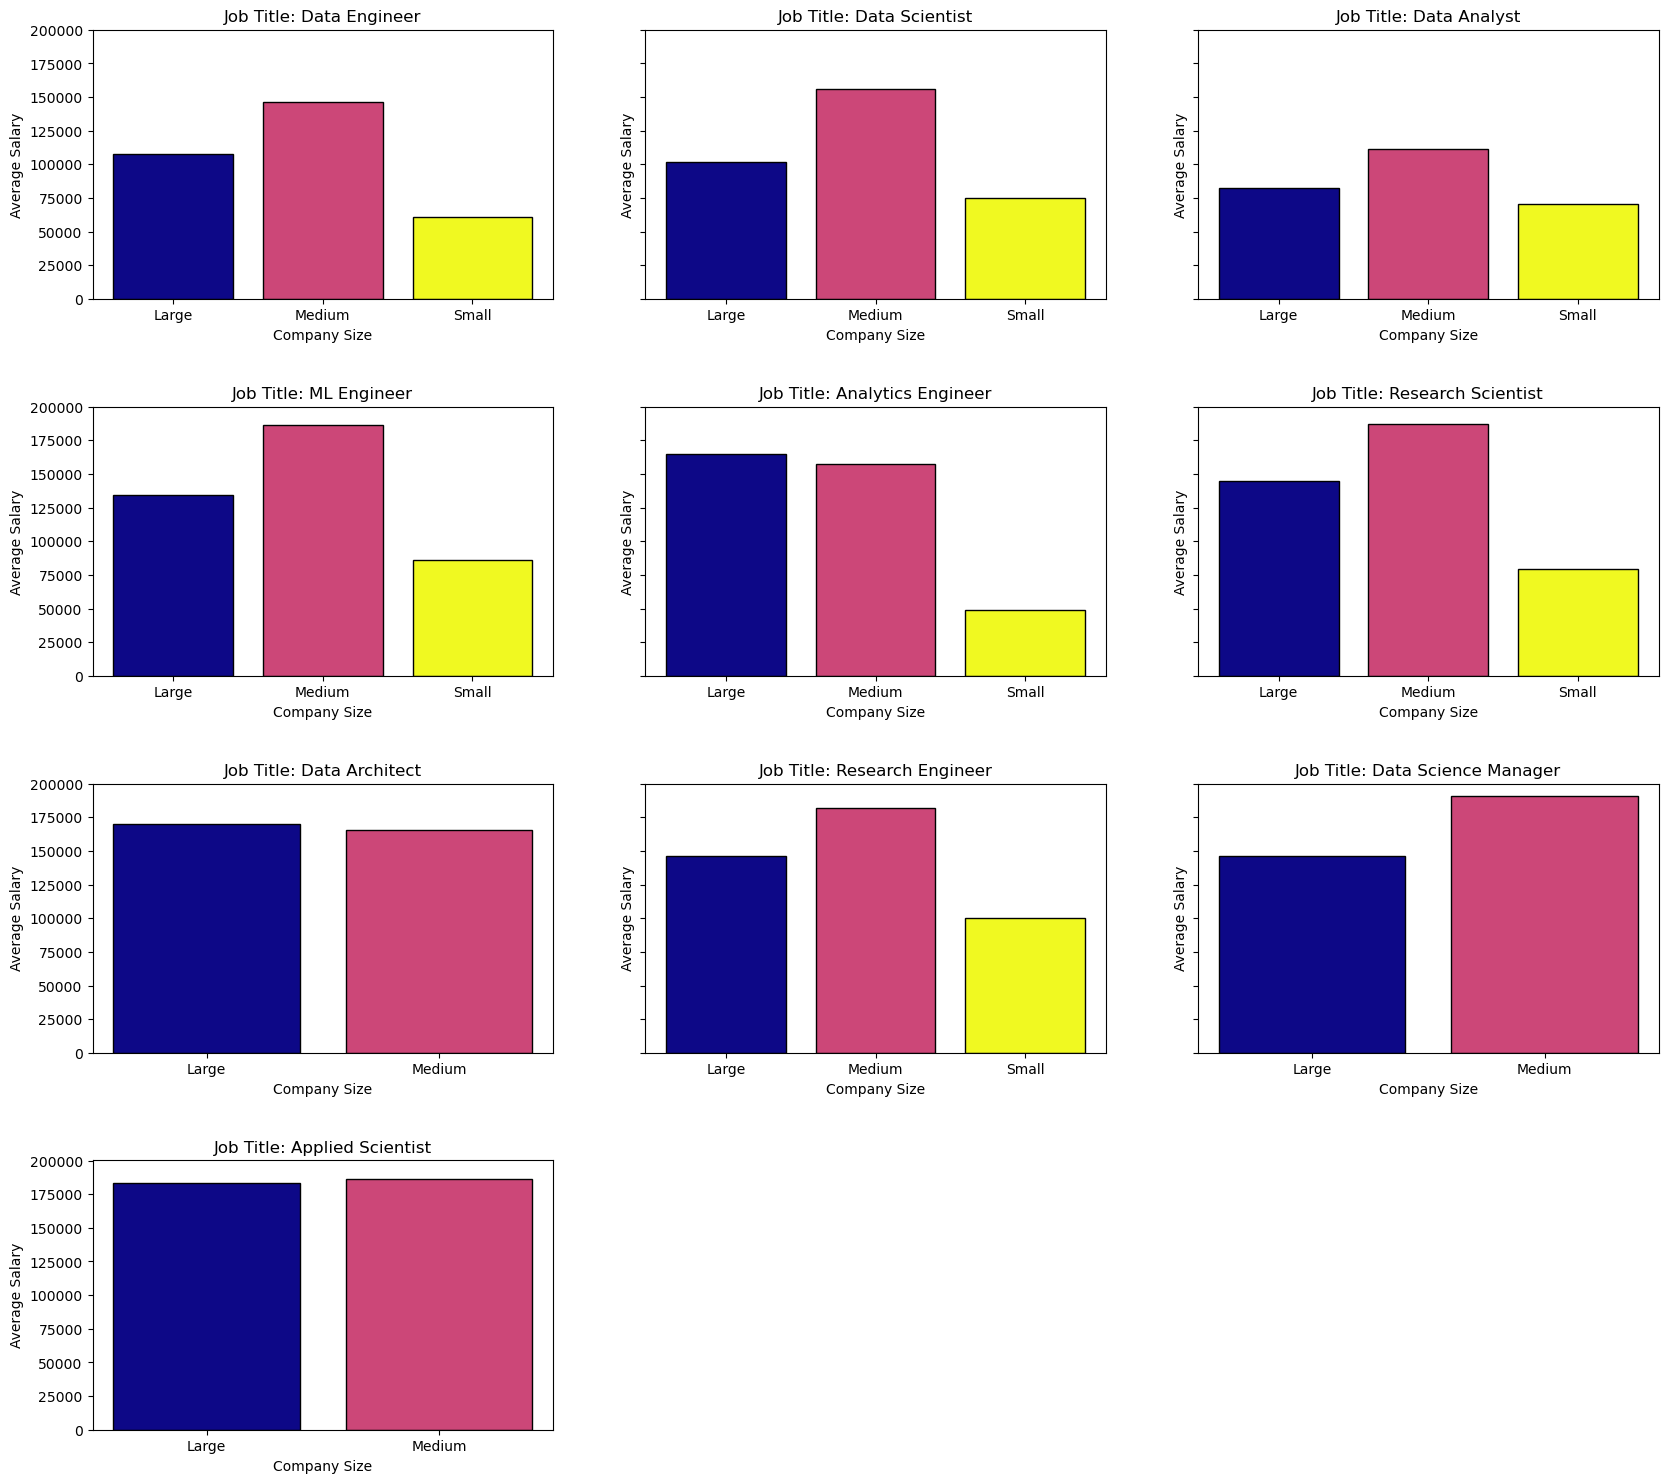

In [25]:
df_cs_avg_sal_jt = df_filtered.groupby(['Job Title', 'Company Size'])['Salary in USD'] \
                              .agg(Mean_Salary='mean') \
                              .round(2).reset_index() \
                              .sort_values(by=['Job Title', 'Company Size', 'Mean_Salary'], ascending=[True, True, False])

# Color Mapping
unique_company_size = df_cs_avg_sal_jt['Company Size'].unique()
colors = plt.cm.plasma(np.linspace(0, 1, len(unique_company_size)))
color_mapping_csize = {csize: color for csize, color in zip(unique_company_size, colors)}

# Create subplots dynamically
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows), sharey=True, sharex=False, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through subplots
for i in range(num_subplots):
    # Get data for the current subplot
    job_title = unique_job_titles[i]
    data = df_cs_avg_sal_jt[df_cs_avg_sal_jt['Job Title'] == job_title]

    # Create a horizontal bar chart
    axs[i].bar(data['Company Size'], data['Mean_Salary'], color=[color_mapping_csize[csize] for csize in data['Company Size']], edgecolor='black')
    
    # Set y-axis ticks as whole numbers
    axs[i].set_xticks(data['Company Size'].unique())

    # Adding labels and title to each subplot
    axs[i].set_xlabel('Company Size')
    axs[i].set_ylabel('Average Salary')
    axs[i].set_title(f'Job Title: {job_title}')

# Remove empty subplots if needed
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axs[i])

# Adjust layout with custom margins
plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.2)

# Display the plot
plt.show()

### __12.5.3: Average Salary vs Company Size (For Each Job Title and Year)__

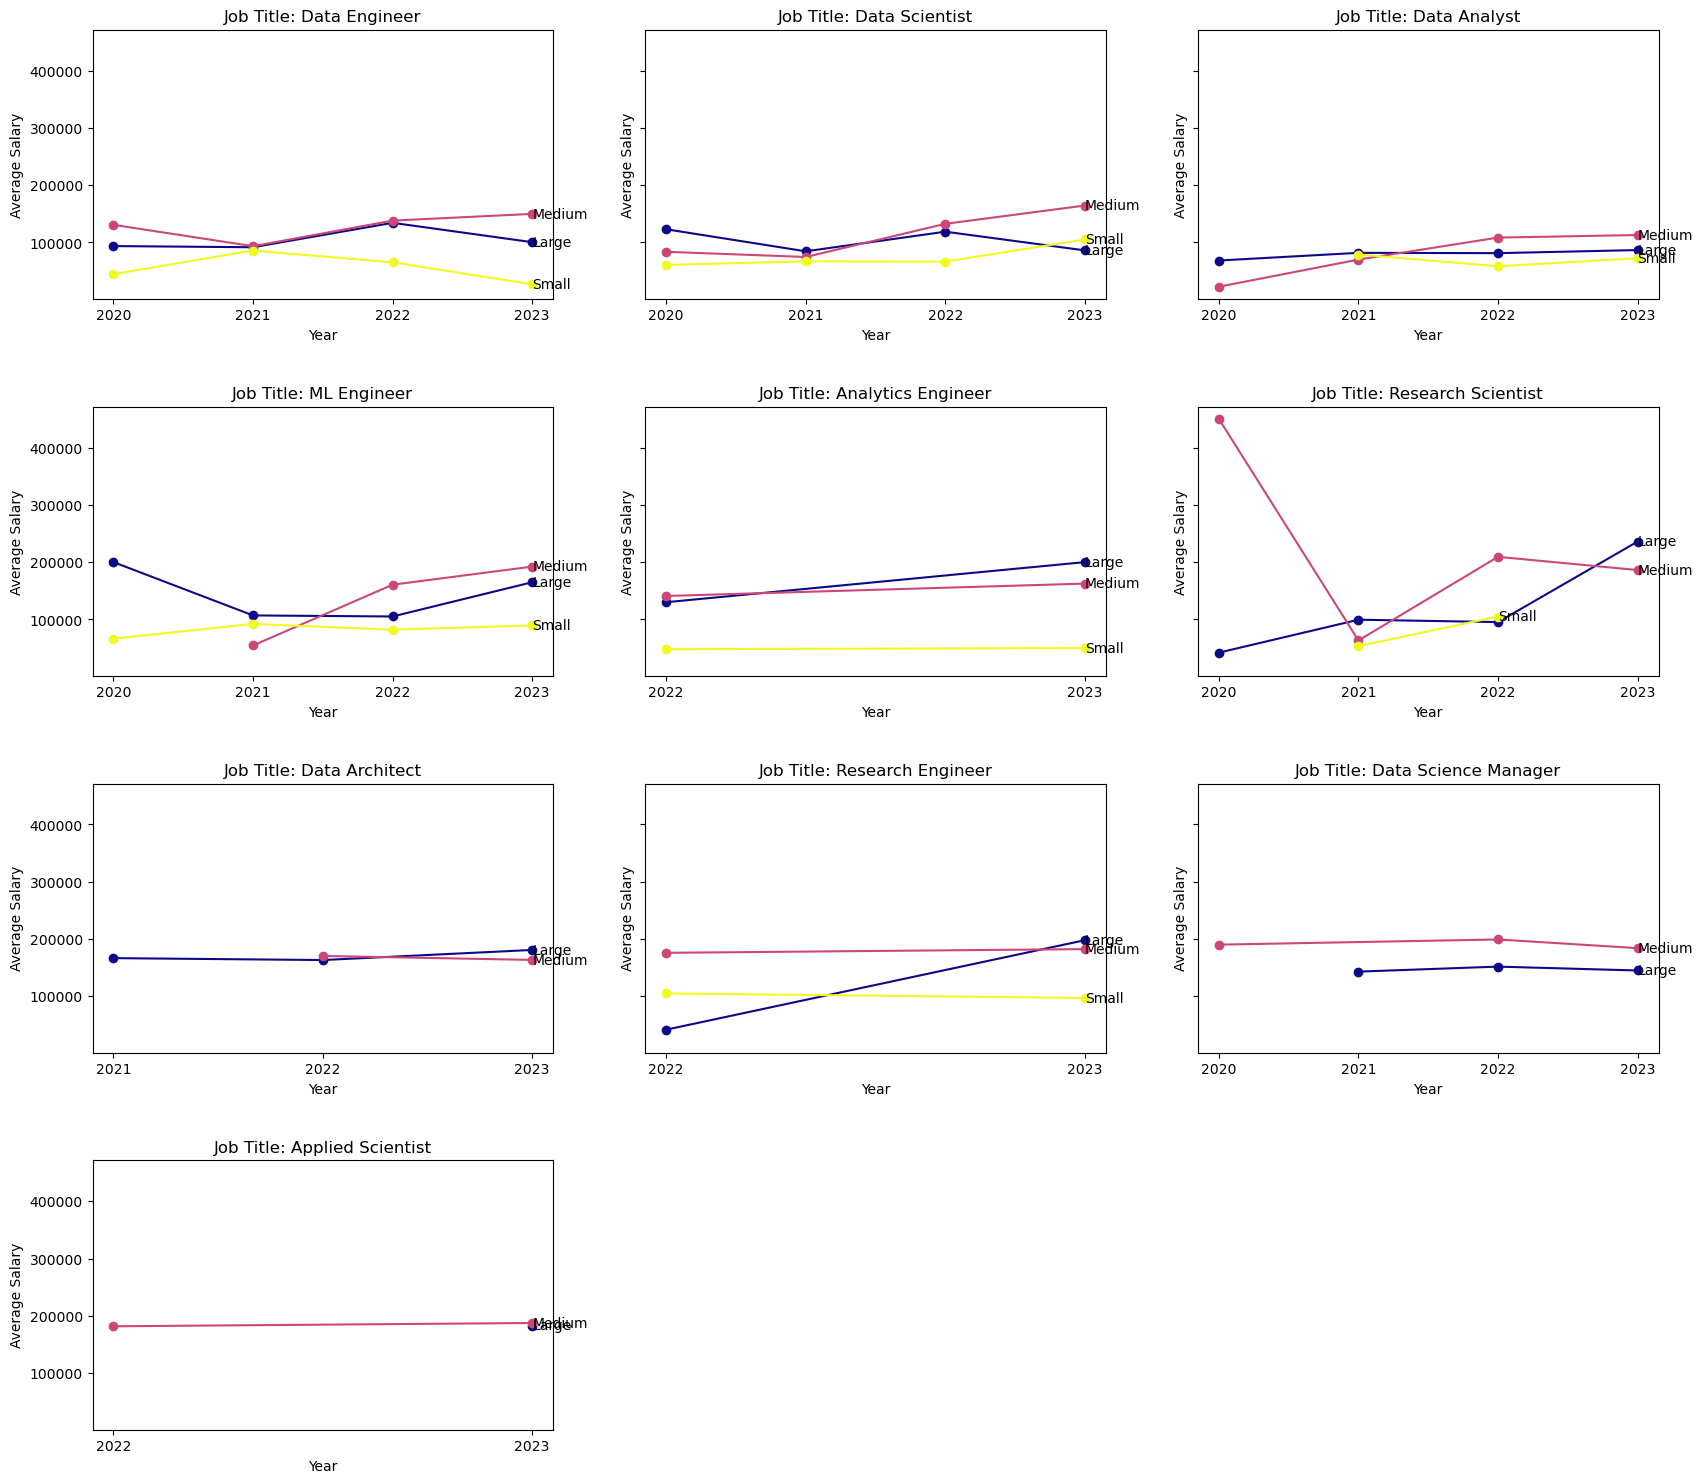

In [26]:
df_cs_avg_sal_jt_yr = df_filtered.groupby(['Job Title', 'Company Size', 'Year'])['Salary in USD'] \
                              .agg(Mean_Salary='mean') \
                              .round(2).reset_index() \
                              .sort_values(by=['Job Title', 'Company Size', 'Year', 'Mean_Salary'], ascending=[True, True, True, False])

# Create subplots dynamically
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows), sharey=True, sharex=False, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through subplots
for i in range(num_subplots):
    # Get data for the current subplot
    job_title = unique_job_titles[i]
    data = df_cs_avg_sal_jt_yr[df_cs_avg_sal_jt_yr['Job Title'] == job_title].sort_values('Year')
    
    # Loop through each company size and plot a separate line
    for company_size, data_company_size in data.groupby('Company Size'):
        axs[i].plot(data_company_size['Year'], data_company_size['Mean_Salary'], label=f'{company_size}', marker='o', color=color_mapping_csize[company_size])
        
        # Annotate each line with the company size
        last_index = data_company_size['Year'].idxmax()
        axs[i].text(data_company_size['Year'].iloc[-1], data_company_size['Mean_Salary'].iloc[-1], f'{company_size}', color='black', fontsize=10, ha='left', va='center')
    
    # Set y-axis ticks as whole numbers
    axs[i].set_xticks(data['Year'].unique())

    # Adding labels and title to each subplot
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Average Salary')
    axs[i].set_title(f'Job Title: {job_title}')

# Remove empty subplots if needed
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axs[i])

# Adjust layout with custom margins
plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.2)

# Display the plot
plt.show()

## __12.6: Employment Type__

### __12.6.1: Average Salary vs Employment Type__

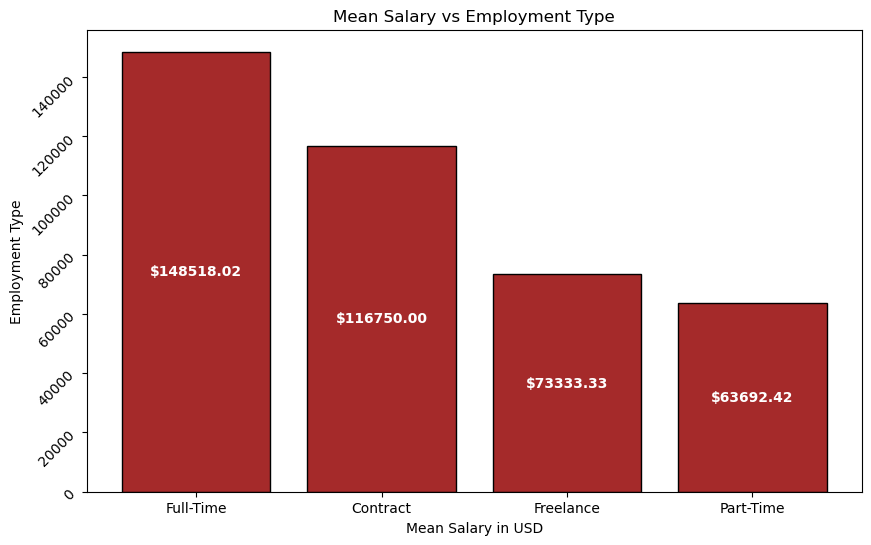

In [27]:
df_et_avg_sal = df_filtered.groupby('Employment Type')['Salary in USD'].agg(mean_salary='mean').round(2).reset_index().sort_values('mean_salary', ascending=False)

# Increase figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart
bars = plt.bar(df_et_avg_sal['Employment Type'], df_et_avg_sal['mean_salary'], color='brown', edgecolor='black')

#Annotate each bar with the mean salary value at the top center
for bar, salary in zip(bars, df_et_avg_sal['mean_salary']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'${salary:.2f}', ha='center', va='center', fontsize=10, color='white', weight='bold')

# Rotate x-axis and y-axis labels
plt.yticks(rotation=45)

# Adding labels and title
plt.xlabel('Mean Salary in USD')
plt.ylabel('Employment Type')
plt.title('Mean Salary vs Employment Type')

# Display the plot
plt.show()

### __12.6.2: Average Salary vs Employment Type (For Each Job Title)__

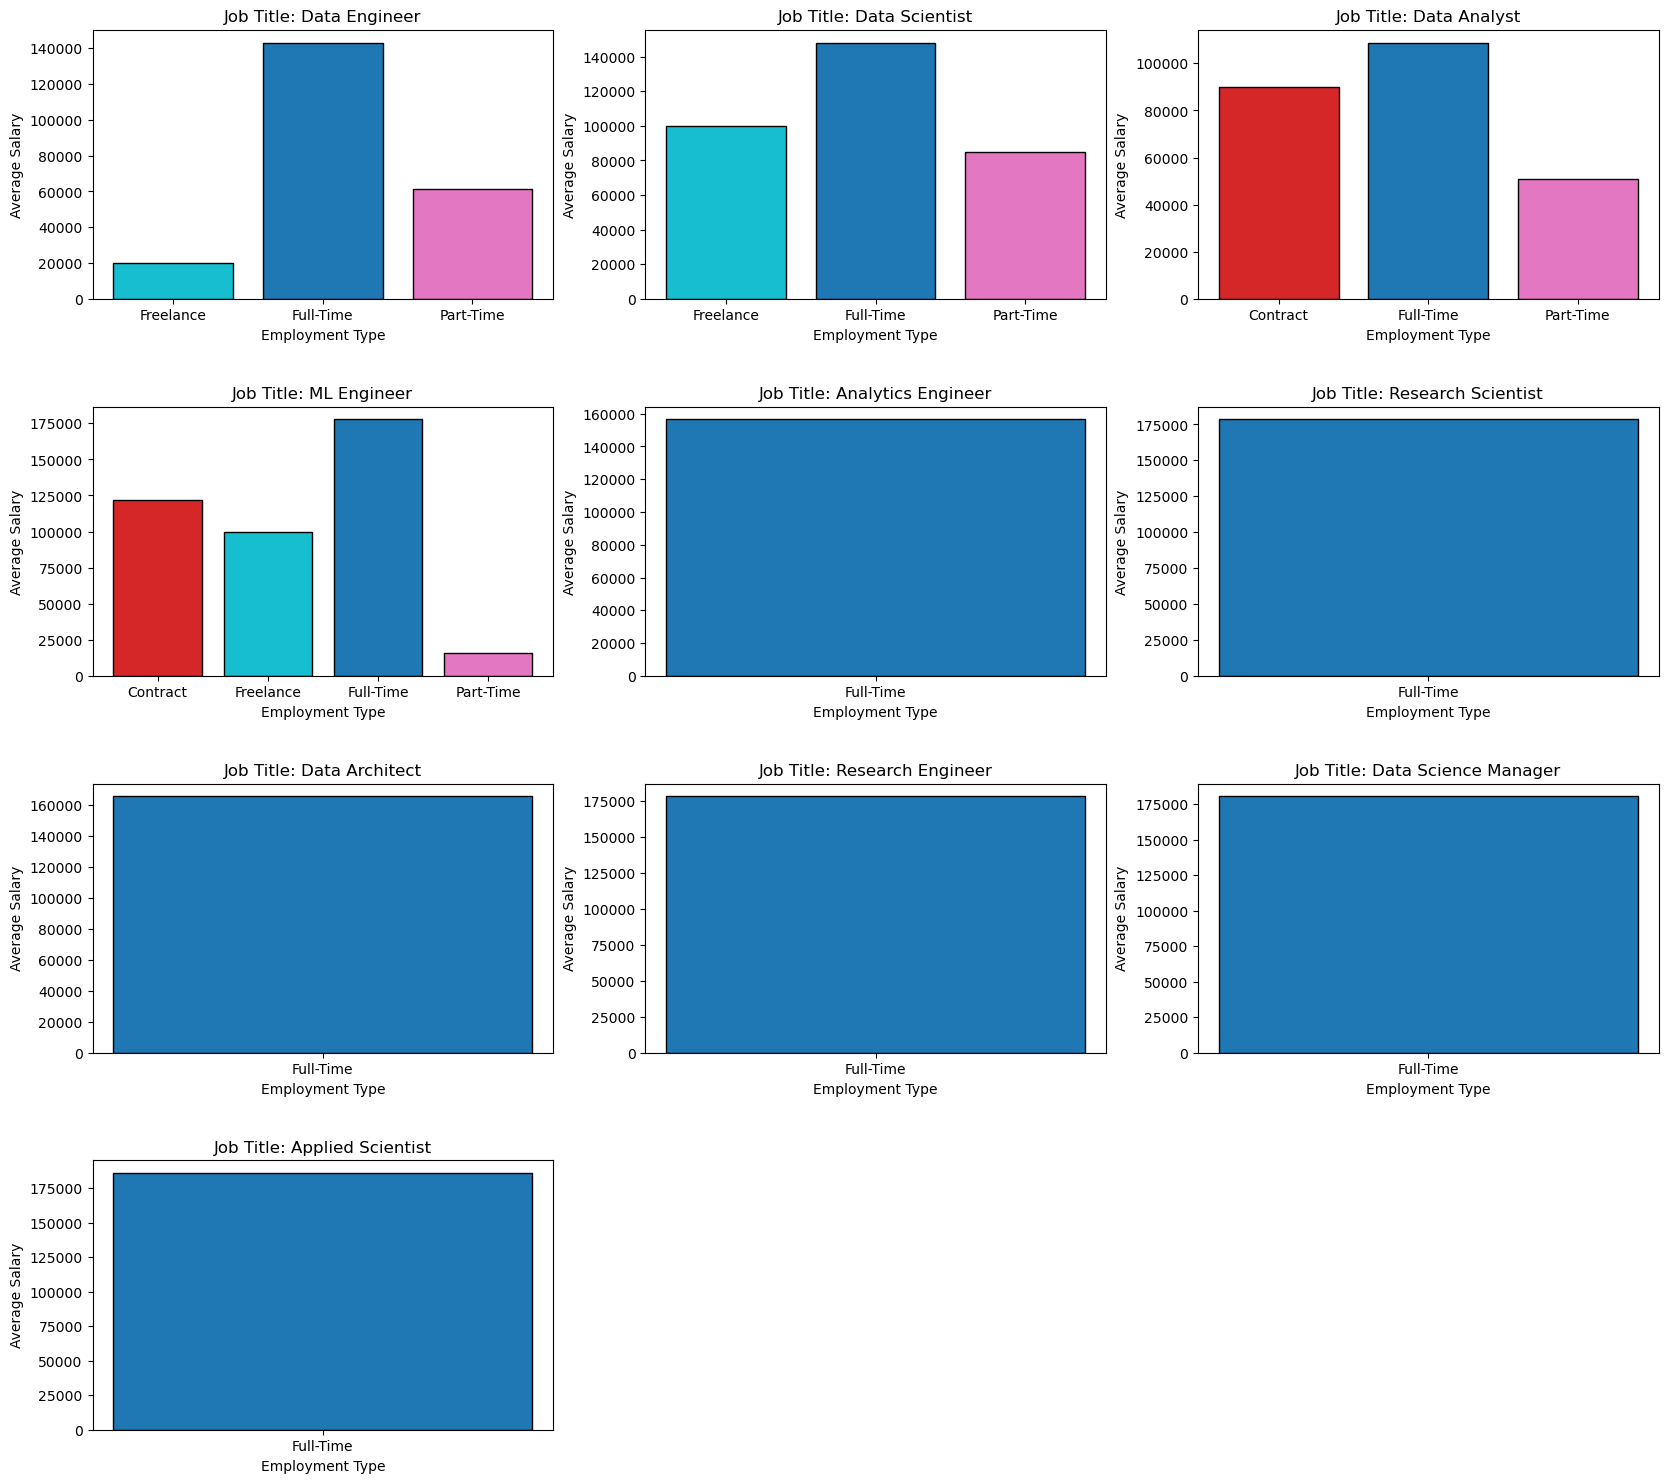

In [28]:
df_et_avg_sal_jt = df_filtered.groupby(['Job Title', 'Employment Type'])['Salary in USD'] \
                              .agg(Mean_Salary='mean').round(2).reset_index() \
                              .sort_values(by=['Job Title', 'Employment Type', 'Mean_Salary'], ascending=[True, True, False])

# Color Mapping
unique_employment_type = df_et_avg_sal_jt['Employment Type'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_employment_type)))
color_mapping_emptyp = {et: color for et, color in zip(unique_employment_type, colors)}

# Create subplots dynamically
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows), sharey=False, sharex=False, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through subplots
for i in range(num_subplots):
    # Get data for the current subplot
    job_title = unique_job_titles[i]
    data = df_et_avg_sal_jt[df_et_avg_sal_jt['Job Title'] == job_title]

    # Create a horizontal bar chart
    axs[i].bar(data['Employment Type'], data['Mean_Salary'], color=[color_mapping_emptyp[et] for et in data['Employment Type']], edgecolor='black')
    
    # Set y-axis ticks as whole numbers
    axs[i].set_xticks(data['Employment Type'].unique())

    # Adding labels and title to each subplot
    axs[i].set_xlabel('Employment Type')
    axs[i].set_ylabel('Average Salary')
    axs[i].set_title(f'Job Title: {job_title}')

# Remove empty subplots if needed
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axs[i])

# Adjust layout with custom margins
plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.2)

# Display the plot
plt.show()


### __12.6.3: Average Salary vs Employment Type (For Each Job Title and Year)__

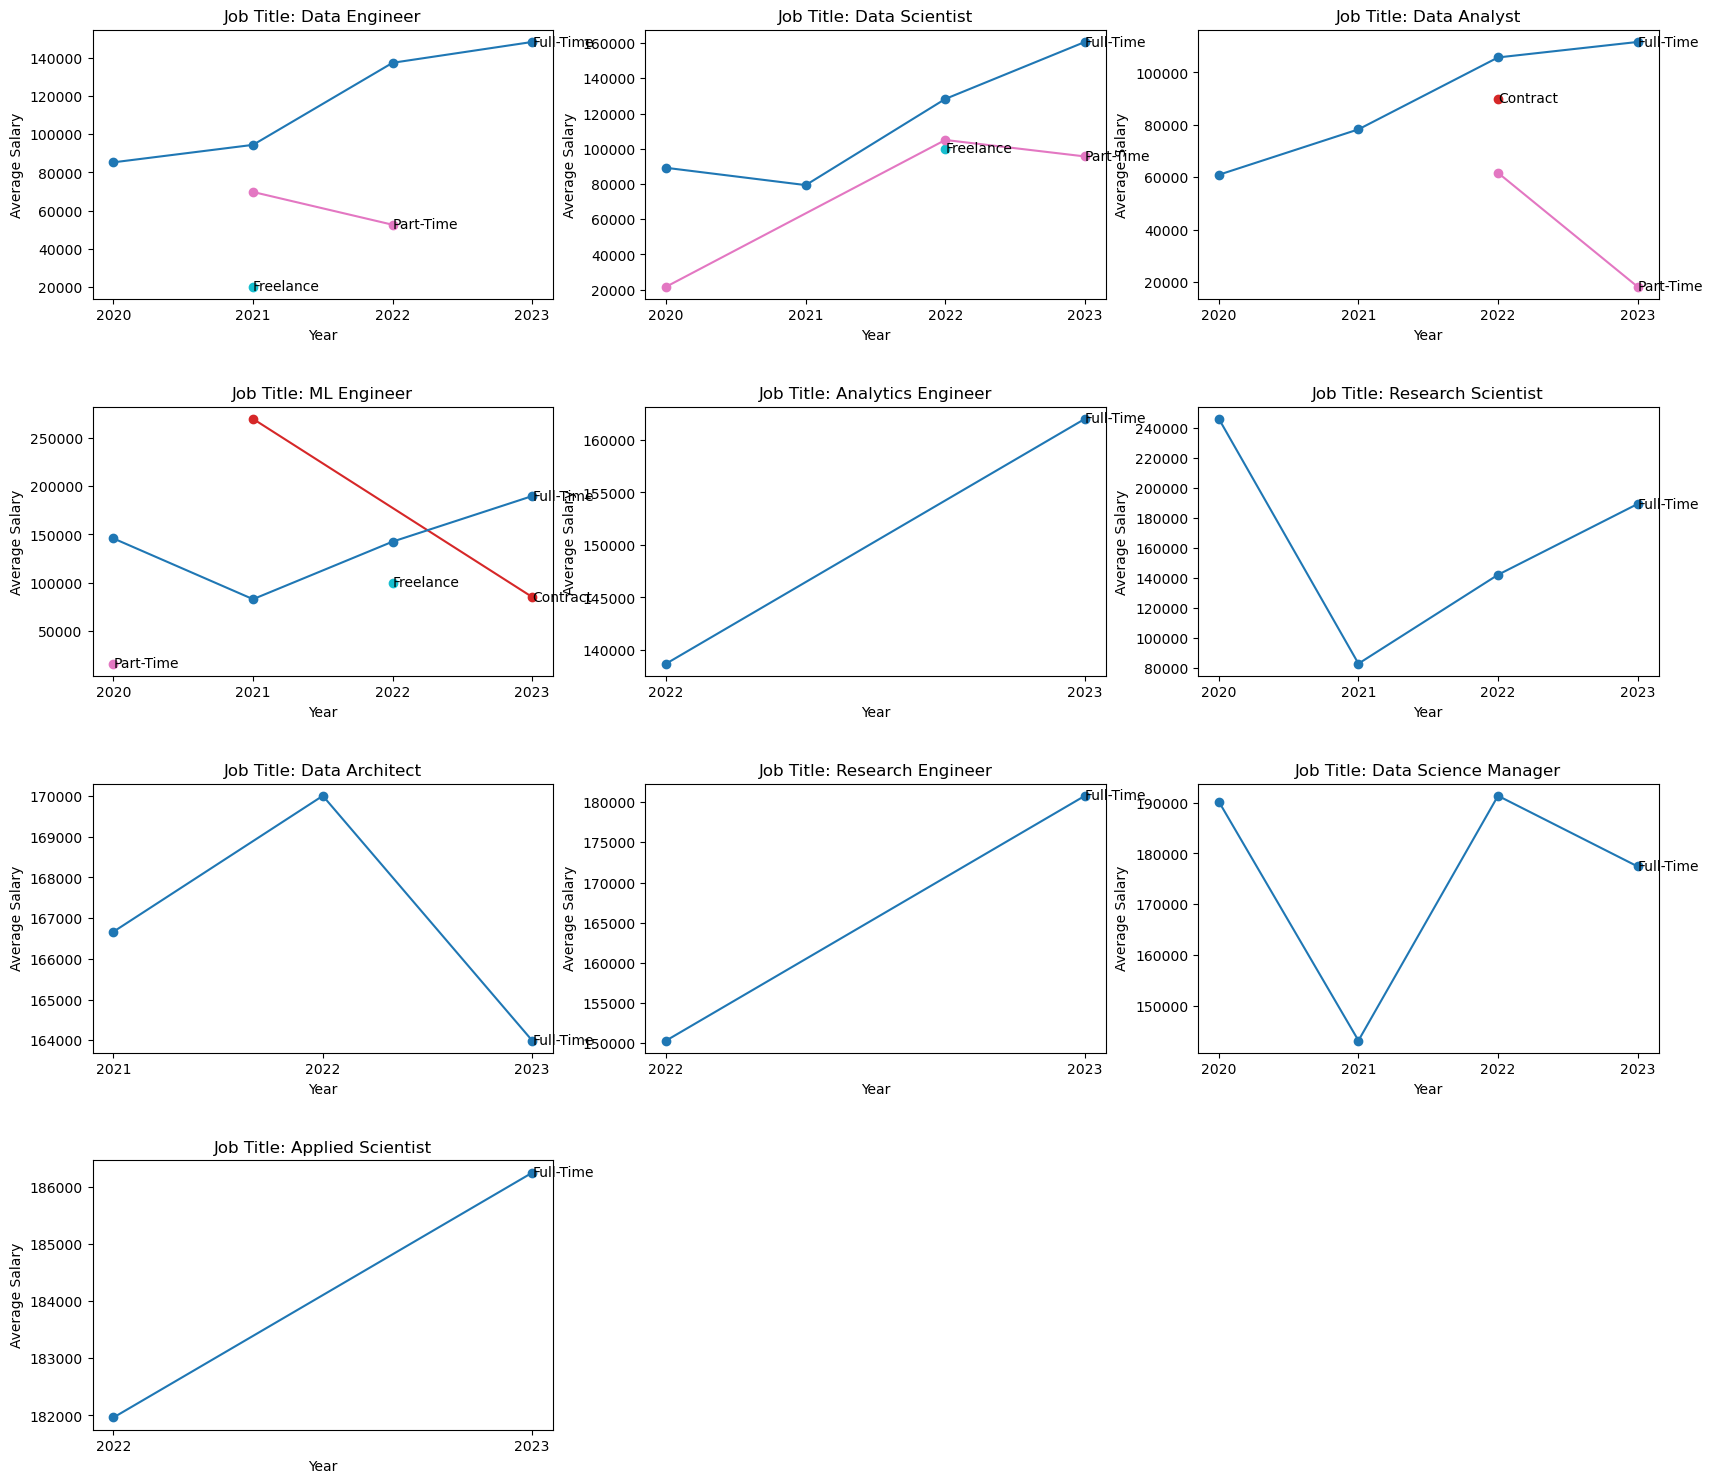

In [29]:
df_et_avg_sal_jt_yr = df_filtered.groupby(['Job Title', 'Employment Type', 'Year'])['Salary in USD'] \
                              .agg(Mean_Salary='mean').round(2).reset_index() \
                              .sort_values(by=['Job Title', 'Employment Type', 'Year', 'Mean_Salary'], ascending=[True, True, True, False])

# Create subplots dynamically
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows), sharey=False, sharex=False, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through subplots
for i in range(num_subplots):
    # Get data for the current subplot
    job_title = unique_job_titles[i]
    data = df_et_avg_sal_jt_yr[df_et_avg_sal_jt_yr['Job Title'] == job_title].sort_values('Year')

    # Loop through each company size and plot a separate line
    for company_size, data_company_size in data.groupby('Employment Type'):
        axs[i].plot(data_company_size['Year'], data_company_size['Mean_Salary'], label=f'{company_size}', marker='o', color=color_mapping_emptyp[company_size])
        
        # Annotate each line with the company size
        last_index = data_company_size['Year'].idxmax()
        axs[i].text(data_company_size['Year'].iloc[-1], data_company_size['Mean_Salary'].iloc[-1], f'{company_size}', color='black', fontsize=10, ha='left', va='center')
    
    # Set y-axis ticks as whole numbers
    axs[i].set_xticks(data['Year'].unique())

    # Adding labels and title to each subplot
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Average Salary')
    axs[i].set_title(f'Job Title: {job_title}')

# Remove empty subplots if needed
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axs[i])

# Adjust layout with custom margins
plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.2)

# Display the plot
plt.show()

## __12.7: Experience Level__

### __12.7.1: Average Salary vs Experience Level__

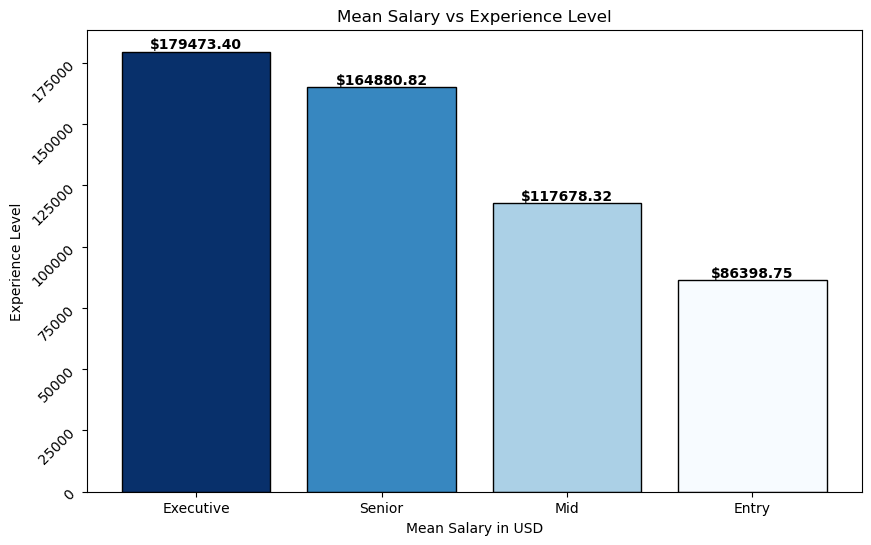

In [30]:
df_avg_sal = df_filtered.groupby('Experience Level')['Salary in USD'].agg(Mean_Salary='mean').round(2).reset_index().sort_values('Mean_Salary', ascending=False)
#df_avg_sal

# Create a blue gradient colormap
colors = plt.cm.Blues_r(np.linspace(0, 1, len(df_avg_sal)))

# Increase figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart
bars = plt.bar(df_avg_sal['Experience Level'], df_avg_sal['Mean_Salary'], color=colors, edgecolor='black')

# Annotate each bar with the mean salary value at the top center
for bar, salary in zip(bars, df_avg_sal['Mean_Salary']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'${salary:.2f}', ha='center', va='bottom', fontsize=10, weight='bold')

# Rotate y-axis labels
plt.yticks(rotation=45)

# Adding labels and title
plt.xlabel('Mean Salary in USD')
plt.ylabel('Experience Level')
plt.title('Mean Salary vs Experience Level')

# Display the plot
plt.show()


### __12.7.2: Average Salary vs Experience Level (For Each Job Title)__

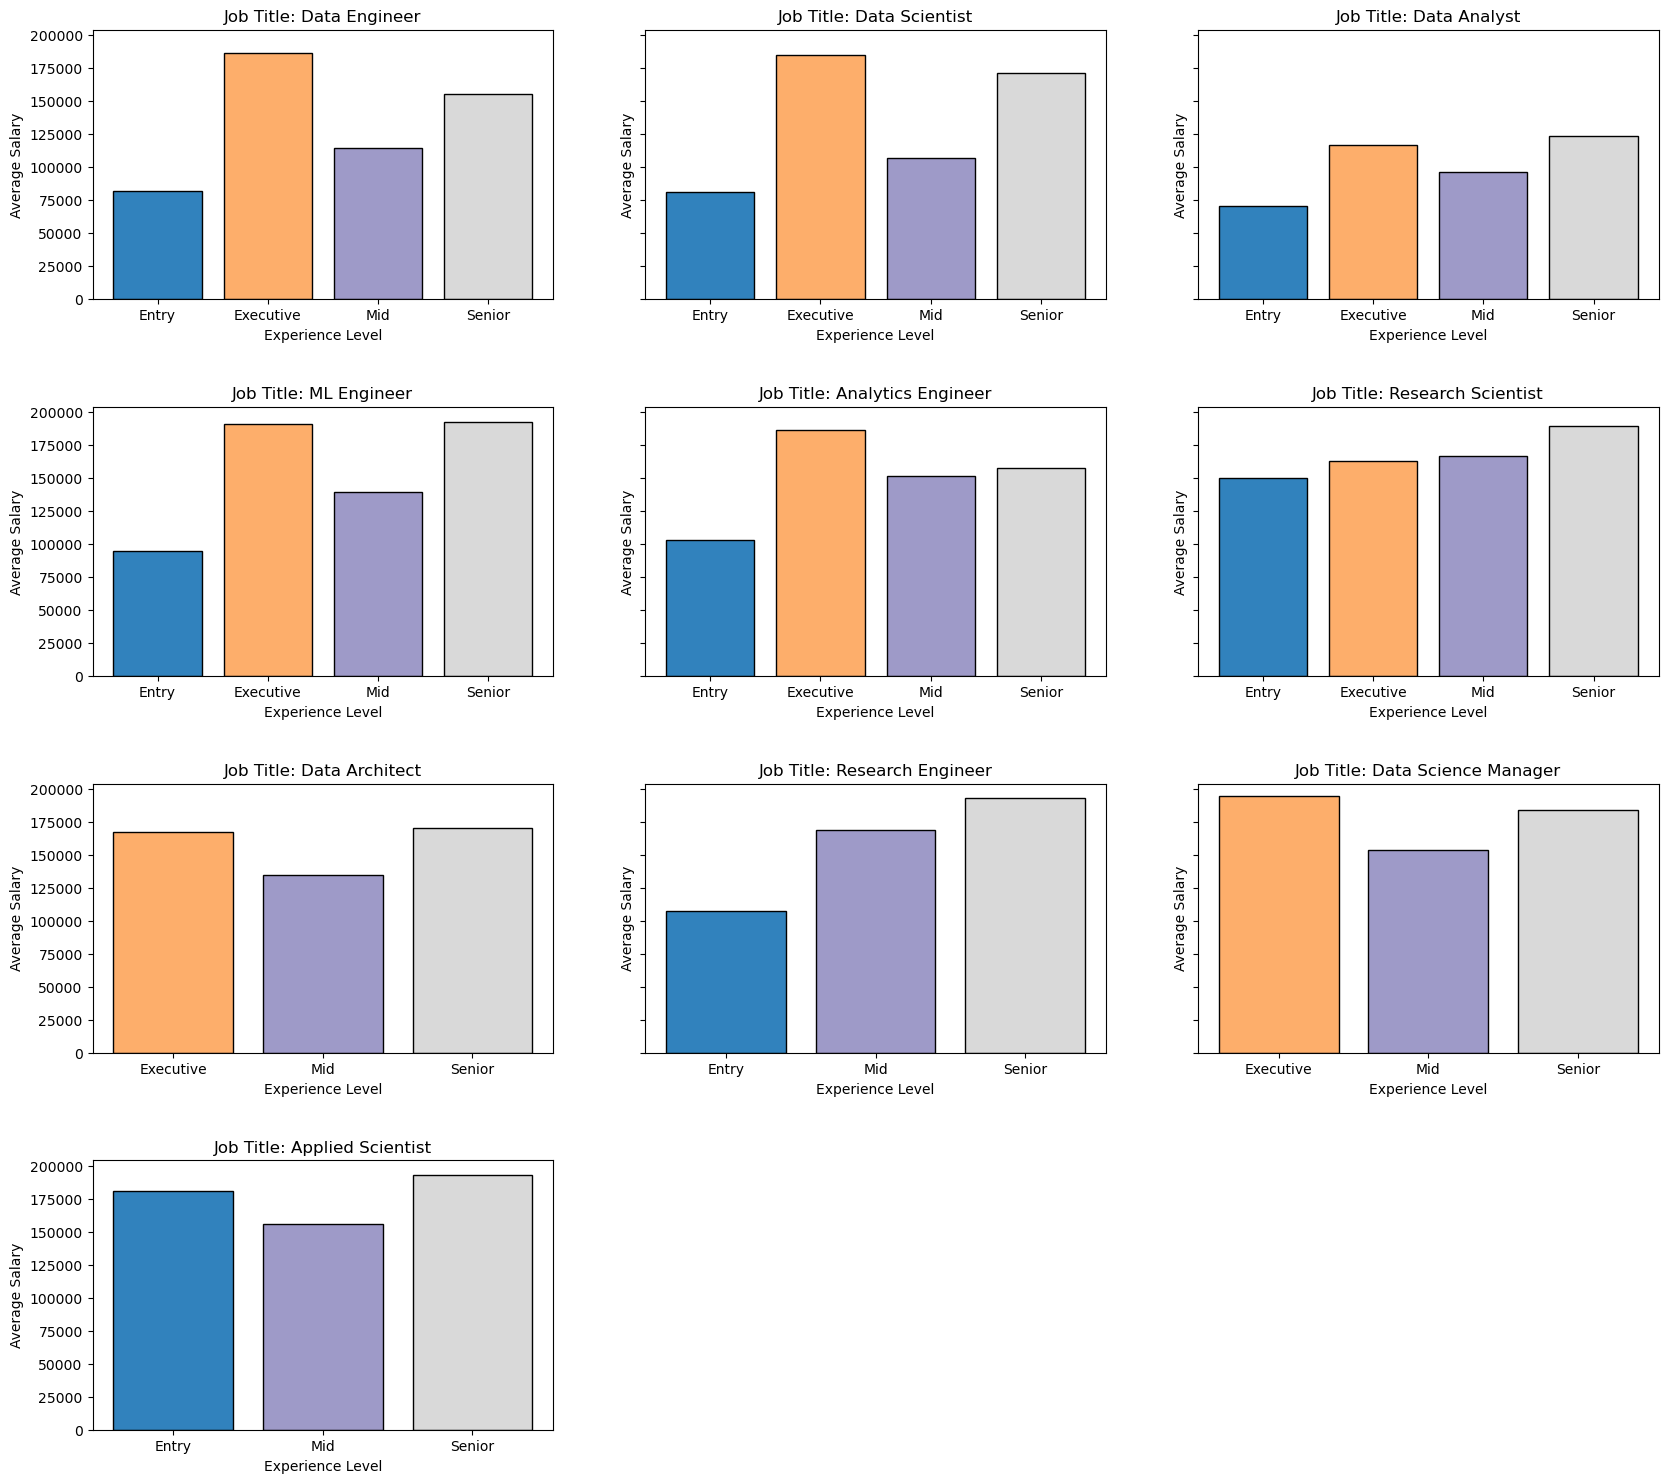

In [31]:
df_avg_sal_jt = df_filtered.groupby(['Job Title', 'Experience Level'])['Salary in USD'] \
                           .agg(Mean_Salary='mean').round(2).reset_index() \
                           .sort_values(by=['Job Title', 'Experience Level', 'Mean_Salary'], ascending=[True, True, False])

# Color Mapping
unique_experience_level = df_avg_sal_jt['Experience Level'].unique()
colors = plt.cm.tab20c(np.linspace(0, 1, len(unique_experience_level)))
color_mapping_explvl = {exp: color for exp, color in zip(unique_experience_level, colors)}

# Create subplots dynamically
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows), sharey=True, sharex=False, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through subplots
for i in range(num_subplots):
    # Get data for the current subplot
    job_title = unique_job_titles[i]
    data = df_avg_sal_jt[df_avg_sal_jt['Job Title'] == job_title]

    # Create a horizontal bar chart
    axs[i].bar(data['Experience Level'], data['Mean_Salary'], color=[color_mapping_explvl[exp] for exp in data['Experience Level']], edgecolor='black')
    
    # Set y-axis ticks as whole numbers
    axs[i].set_xticks(data['Experience Level'].unique())

    # Adding labels and title to each subplot
    axs[i].set_xlabel('Experience Level')
    axs[i].set_ylabel('Average Salary')
    axs[i].set_title(f'Job Title: {job_title}')

# Remove empty subplots if needed
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axs[i])

# Adjust layout with custom margins
plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.2)

# Display the plot
plt.show()


### __12.7.3: Average Salary vs Experience Level (For Each Job Title and Year)__

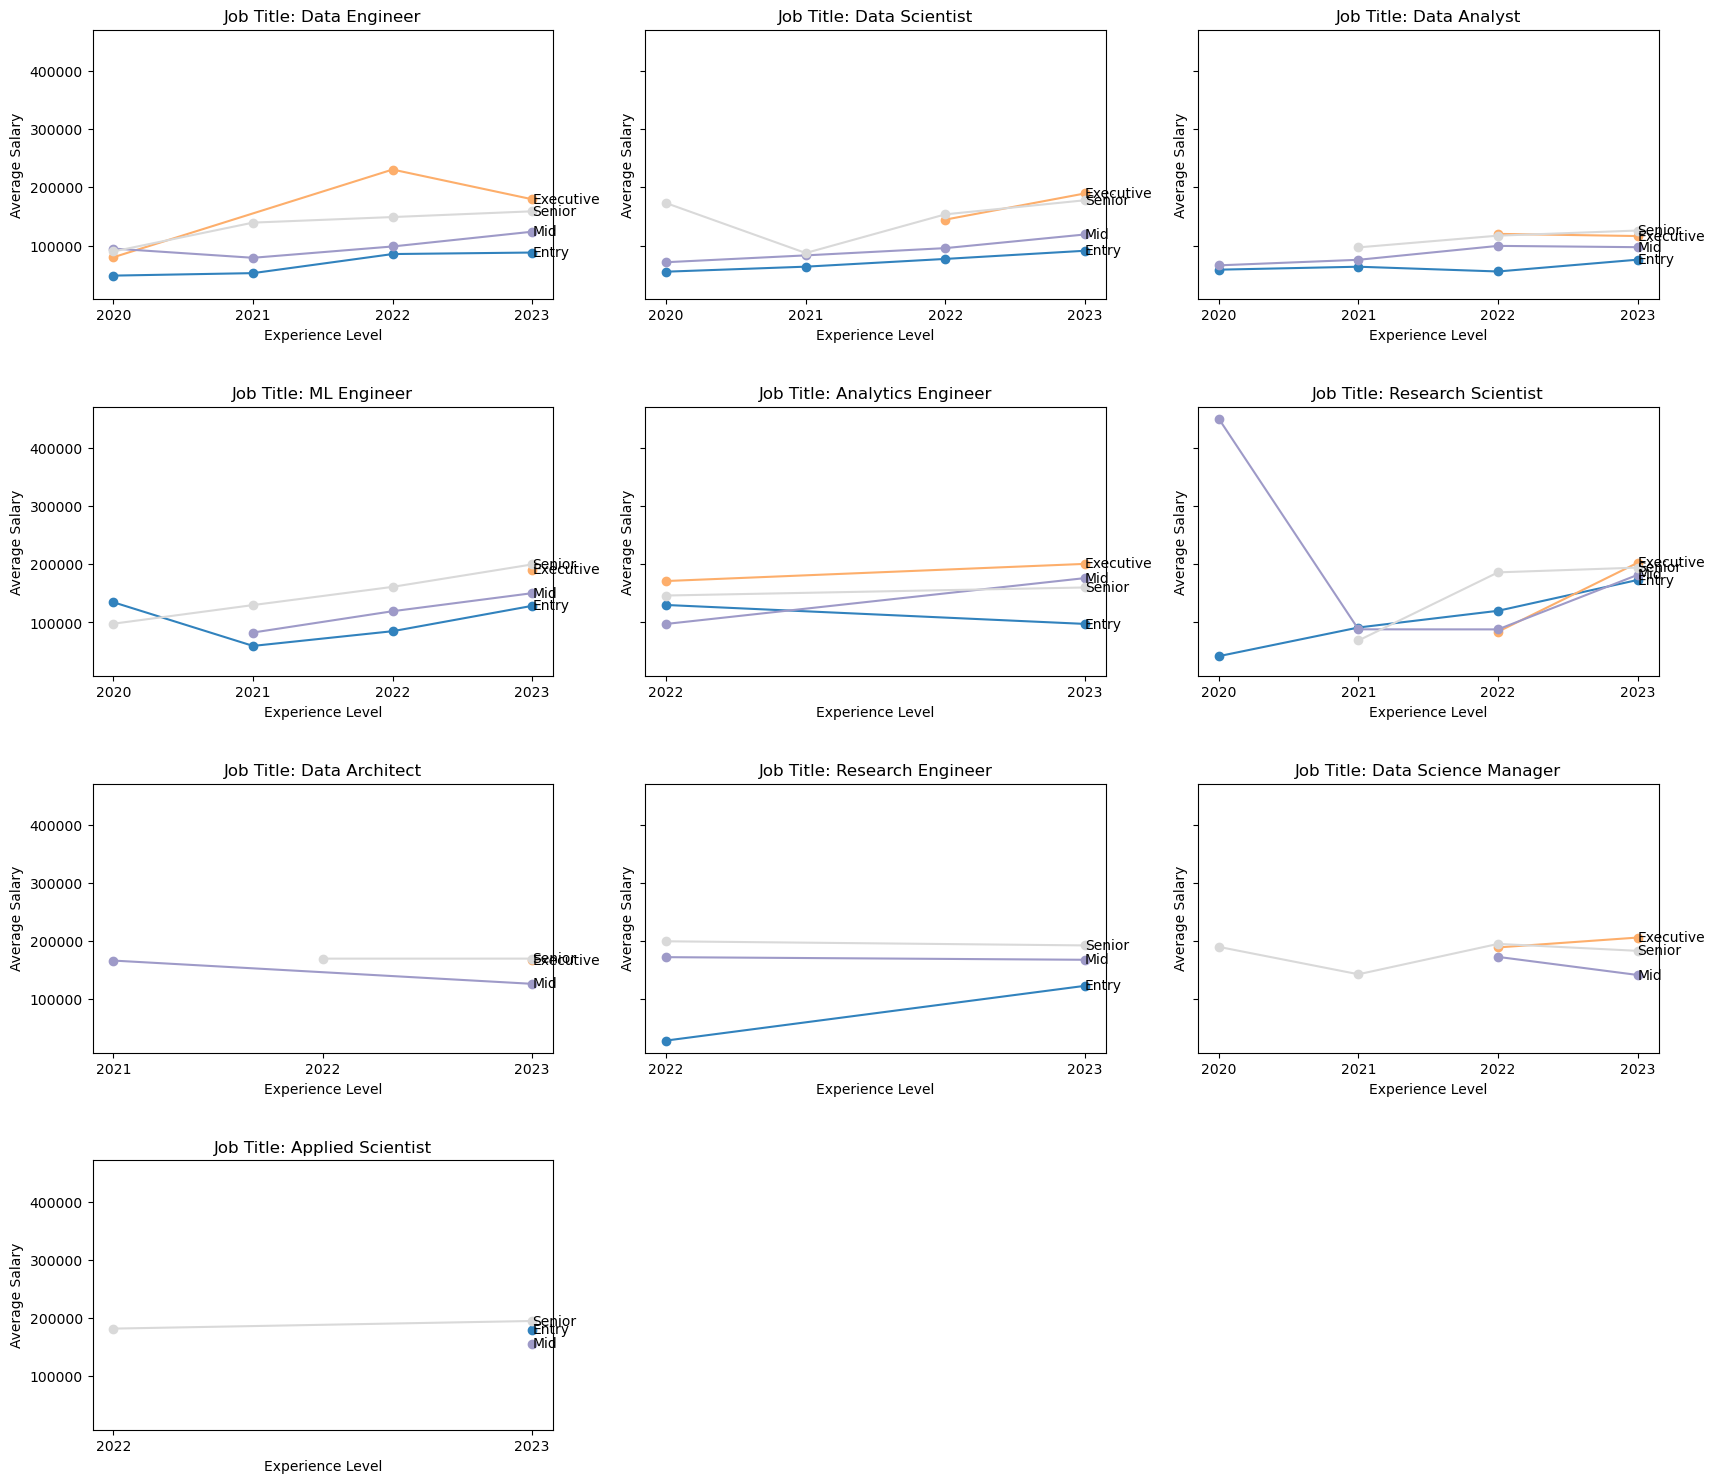

In [32]:
df_avg_sal_jt_yr = df_filtered.groupby(['Job Title', 'Experience Level', 'Year'])['Salary in USD'] \
                           .agg(Mean_Salary='mean').round(2).reset_index() \
                           .sort_values(by=['Job Title', 'Experience Level', 'Year', 'Mean_Salary'], ascending=[True, True, True, False])

# Create subplots dynamically
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows), sharey=True, sharex=False, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through subplots
for i in range(num_subplots):
    # Get data for the current subplot
    job_title = unique_job_titles[i]
    data = df_avg_sal_jt_yr[df_avg_sal_jt_yr['Job Title'] == job_title].sort_values('Year')

    # Loop through each company size and plot a separate line
    for company_size, data_company_size in data.groupby('Experience Level'):
        axs[i].plot(data_company_size['Year'], data_company_size['Mean_Salary'], label=f'{company_size}', marker='o', color=color_mapping_explvl[company_size])
        
        # Annotate each line with the company size
        last_index = data_company_size['Year'].idxmax()
        axs[i].text(data_company_size['Year'].iloc[-1], data_company_size['Mean_Salary'].iloc[-1], f'{company_size}', color='black', fontsize=10, ha='left', va='center')
    
    # Set y-axis ticks as whole numbers
    axs[i].set_xticks(data['Year'].unique())
    
    # Adding labels and title to each subplot
    axs[i].set_xlabel('Experience Level')
    axs[i].set_ylabel('Average Salary')
    axs[i].set_title(f'Job Title: {job_title}')

# Remove empty subplots if needed
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axs[i])

# Adjust layout with custom margins
plt.subplots_adjust(left=0.08, right=0.95, top=0.9, bottom=0.2)

# Display the plot
plt.show()

# __13: Conclusion__

All the conclusion mentioned here are with respect to the top 10 job titles from the original dataset and 'Salary in USD' is considered to find average. The job titles are as follows:

1. Data Engineer
2. Data Scientist
3. Data Analyst
4. ML Engineer
5. Analytics Engineer
6. Research Scientist
7. Data Architect
8. Research Engineer
9. Data Science Manager
10. Applied Scientist

__YEAR:__

While the number of job counts have increased over the years, we could not say the same for the average salary. In most of the cases, the average salaries has taken a dip in the year 2021. One of the possible reason could be COVID. COVID was still going on and business was still suffering. This might have reduced the profit which in turn caused reduction in the average wages. Presence of company domain data would have given us a more clear idea about what could be the possible reason.

__COMPANY LOCATION:__

Cumulatively, Ukraine showed the highest average salary. But when viewed for each job title, only the ML engineer roles showed up in Ukraine. The cost of living in United States is far higher than that of Ukraine. This leads me to believe that there is an imbalance in our data. ML Engineers cannot work alone. Other job titles are as important for successful implementation of any machine learning or artificial intelligence project. This leads me to think that complete data is not present in the dataset.

__COMPANY SIZE:__

The medium sized companies have consistently maintained their highest average salary for the job roles. But nothing specific can be concluded by seeing the changes through the years. Reduction in average salary can be seen in both 2021 and 2023. The most concerning reduction is for the Research Scientist role in the medium sized company. The possibility is that COVID was responsible for the dip in 2021. Year 2023 saw mass layoffs in so many companies and it is possible that the roles are dissolved in most of them. This could bring down the overall average value.

__EMPLOYMENT TYPE:__

Full-time jobs have the highest average salary both cumulatively and for each job role. In most of the cases, the only employment type allowed by companies is full-time. But, when we view the salary changes wrt to Year, there are some random decrease in the wages which could be explained by a variety of factors.

__EXPERIENCE LEVEL:__

One would expect that the executive would have the highest salary and the holisitic bar chart shows the same. But when I plotted for each job title, the Senior position showed a comparable value to the Executive position. In this case also, the changes in salary is random with a concerning drop in the Research Scientist position. It doesn't seem practical for a drastic fall in salary for such a high paying position. Once again, this leads me to assume that the position could be dissolved altogether once goal is achieved for the particular project.
